In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Checking if we are using google colab or local machine and configuring 
# imports accordingly
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP
from cnp.run_experiment import run_experiment

import torch
import numpy as np
from copy import copy

# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [5]:
if google_colab=='yes':
    config_dir = 'base_configs'
else:
    config_dir = os.path.join(BASE_DIR,'base_configs')

# checkin the parameters
# loading the base config file for this experiment
with open(os.path.join(config_dir,'gp_paper_configs.json')) as f:
    file = f.read()
    base_config = json.loads(file)
base_config

{'cnp_params': {'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0.2,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128,
  'aggregation_kwargs': {'aggregator': None,
   'simple_aggregator_type': 'mean'}},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.GaussianProcess',
  'init_kwargs': {'steps': 400, 'range_x': [-2, 2], 'xdim': 1},
  'num_instances_train': 64,
  'num_instances_vali': 10,
  'num_instances_test': 100,
  'noise': 0.0004,
  'length_scale': 0.4,
  'gamma': 1},
 'experiment_params': {'lr': 0.0001,
  'n_epochs': 200000,
  'seed': 1,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_train': 64,
  'batch_size_vali': 10,
  'batch_size_test': 10,
  'plot_progress': True,
  'plot_mode': '1d_regression',
  'print_after': 1000}}

In [6]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    base_config['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    base_config['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [37]:
base_config['cnp_params']['dimx'] = 1
base_config['cnp_params']['aggregation_kwargs'] = {
    "aggregator": "TargetBasedAggregation" ,
    "distance_metric": "laplace_kernel" ,
  }
    

base_config['data_kwargs']['init_kwargs']['xdim'] = 1
base_config['train_kwargs']['plot_mode'] = '1d_regression'


In [38]:
base_config['train_kwargs']['print_after'] = 1000

## Simple Mean Experiment 

In [39]:
mean_exp_config = copy(base_config)

  0%|          | 0/200000 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=128, bias=True)
  )
)
Mean training loss at epoch 0 :                         1.607
Mean Validation loss after 0 equals                     1.872



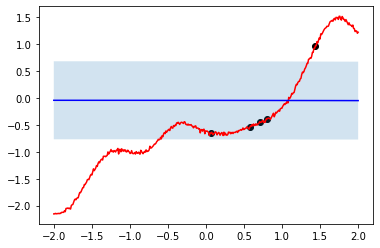

  0%|          | 6/200000 [00:00<11:27:06,  4.85it/s]

Validation loss for the function plotted:                                     1.872


  0%|          | 996/200000 [00:20<1:03:55, 51.88it/s]

Mean training loss at epoch 1000 :                         0.862
Mean Validation loss after 1000 equals                     1.27



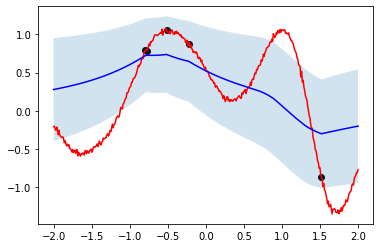

Validation loss for the function plotted:                                     1.27


  1%|          | 1999/200000 [00:41<1:09:11, 47.70it/s]

Mean training loss at epoch 2000 :                         0.97
Mean Validation loss after 2000 equals                     1.147



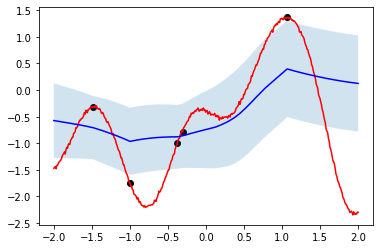

  1%|          | 2009/200000 [00:41<1:39:45, 33.08it/s]

Validation loss for the function plotted:                                     1.147


  1%|▏         | 2998/200000 [01:03<1:05:43, 49.96it/s]

Mean training loss at epoch 3000 :                         0.854
Mean Validation loss after 3000 equals                     1.244



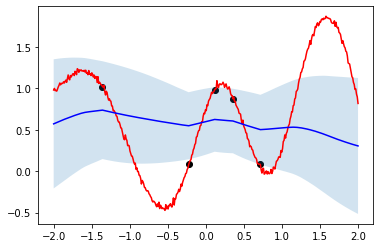

  2%|▏         | 3008/200000 [01:03<1:39:51, 32.88it/s]

Validation loss for the function plotted:                                     1.244


  2%|▏         | 3999/200000 [01:24<1:09:20, 47.11it/s]

Mean training loss at epoch 4000 :                         0.93
Mean Validation loss after 4000 equals                     0.893



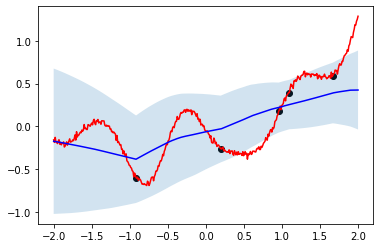

Validation loss for the function plotted:                                     0.893


  2%|▏         | 4999/200000 [01:45<1:09:34, 46.71it/s]

Mean training loss at epoch 5000 :                         1.105
Mean Validation loss after 5000 equals                     1.351



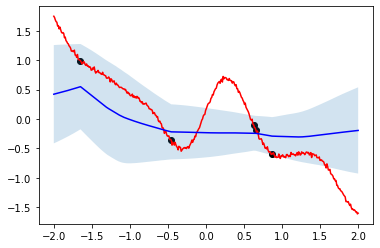

  3%|▎         | 5009/200000 [01:46<1:39:32, 32.65it/s]

Validation loss for the function plotted:                                     1.351


  3%|▎         | 5997/200000 [02:07<1:08:31, 47.18it/s]

Mean training loss at epoch 6000 :                         0.952
Mean Validation loss after 6000 equals                     1.16



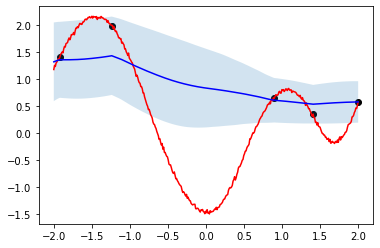

  3%|▎         | 6006/200000 [02:08<2:07:14, 25.41it/s]

Validation loss for the function plotted:                                     1.16


  3%|▎         | 6998/200000 [02:30<1:08:48, 46.75it/s]

Mean training loss at epoch 7000 :                         0.656
Mean Validation loss after 7000 equals                     0.869



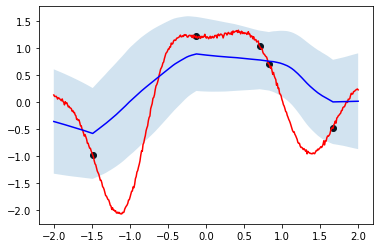

  4%|▎         | 7008/200000 [02:30<1:39:22, 32.37it/s]

Validation loss for the function plotted:                                     0.869


  4%|▍         | 7998/200000 [02:50<1:03:42, 50.23it/s]

Mean training loss at epoch 8000 :                         0.614
Mean Validation loss after 8000 equals                     0.91



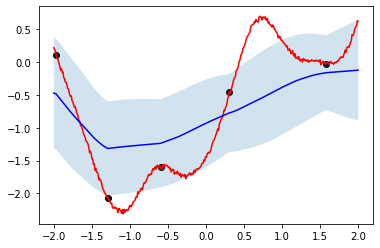

Validation loss for the function plotted:                                     0.91


  4%|▍         | 8995/200000 [03:12<1:02:01, 51.32it/s]

Mean training loss at epoch 9000 :                         0.491
Mean Validation loss after 9000 equals                     0.968



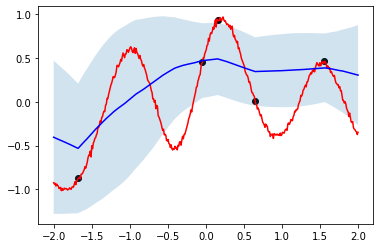

  5%|▍         | 9006/200000 [03:12<1:29:25, 35.60it/s]

Validation loss for the function plotted:                                     0.968


  5%|▍         | 9996/200000 [03:35<1:06:29, 47.63it/s]

Mean training loss at epoch 10000 :                         0.792
Mean Validation loss after 10000 equals                     1.139



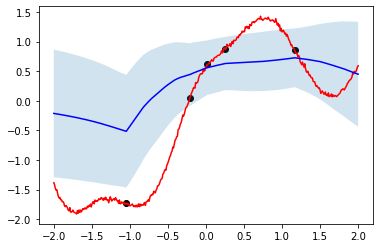

  5%|▌         | 10006/200000 [03:35<1:33:04, 34.02it/s]

Validation loss for the function plotted:                                     1.139


  5%|▌         | 10998/200000 [03:55<1:18:47, 39.98it/s]

Mean training loss at epoch 11000 :                         0.792
Mean Validation loss after 11000 equals                     0.841



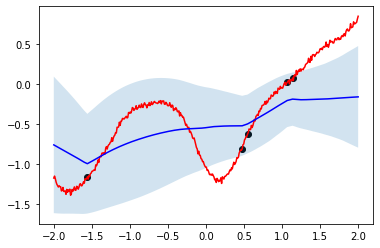

  6%|▌         | 11008/200000 [03:56<1:47:56, 29.18it/s]

Validation loss for the function plotted:                                     0.841


  6%|▌         | 11995/200000 [04:16<1:00:52, 51.48it/s]

Mean training loss at epoch 12000 :                         1.05
Mean Validation loss after 12000 equals                     0.953



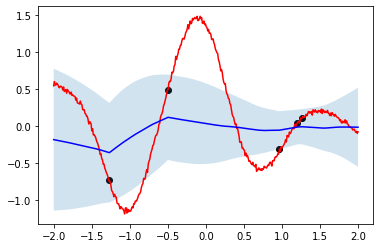

Validation loss for the function plotted:                                     0.953

  6%|▌         | 12007/200000 [04:17<1:23:11, 37.66it/s]

  6%|▋         | 12995/200000 [04:36<1:00:34, 51.45it/s]

Mean training loss at epoch 13000 :                         0.731
Mean Validation loss after 13000 equals                     1.29



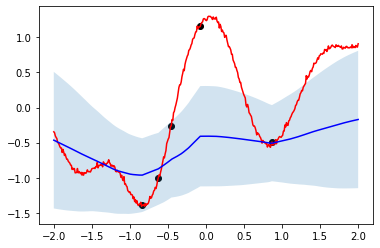

Validation loss for the function plotted:                                     1.29

  7%|▋         | 13006/200000 [04:37<1:22:54, 37.59it/s]

  7%|▋         | 13996/200000 [04:56<1:00:41, 51.08it/s]

Mean training loss at epoch 14000 :                         0.727
Mean Validation loss after 14000 equals                     0.932



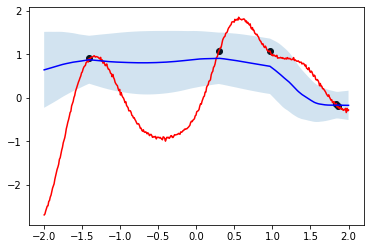

Validation loss for the function plotted:                                     0.932


  7%|▋         | 14998/200000 [05:17<1:03:22, 48.66it/s]

Mean training loss at epoch 15000 :                         0.415
Mean Validation loss after 15000 equals                     1.019



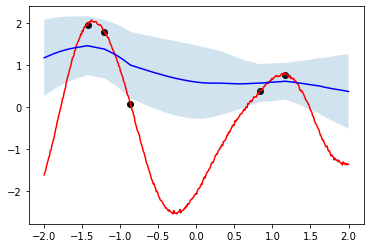

  8%|▊         | 15009/200000 [05:17<1:28:23, 34.88it/s]

Validation loss for the function plotted:                                     1.019


  8%|▊         | 15997/200000 [05:38<1:01:06, 50.18it/s]

Mean training loss at epoch 16000 :                         0.783
Mean Validation loss after 16000 equals                     0.87



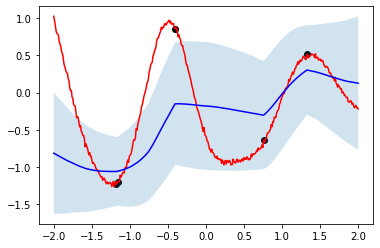

  8%|▊         | 16003/200000 [05:38<1:31:24, 33.55it/s]

Validation loss for the function plotted:                                     0.87


  8%|▊         | 17000/200000 [05:58<59:06, 51.60it/s]  

Mean training loss at epoch 17000 :                         0.81
Mean Validation loss after 17000 equals                     1.08



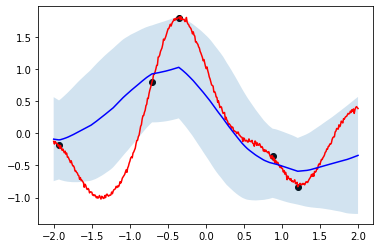

  9%|▊         | 17006/200000 [05:58<1:44:53, 29.08it/s]

Validation loss for the function plotted:                                     1.08


  9%|▉         | 17996/200000 [06:20<1:05:04, 46.62it/s]

Mean training loss at epoch 18000 :                         0.974
Mean Validation loss after 18000 equals                     0.814



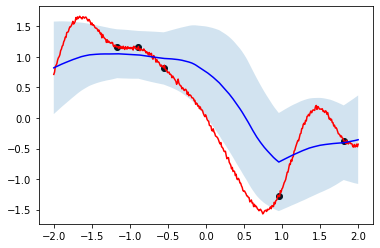

  9%|▉         | 18007/200000 [06:21<1:28:42, 34.19it/s]

Validation loss for the function plotted:                                     0.814


  9%|▉         | 18995/200000 [06:41<56:55, 53.00it/s]  

Mean training loss at epoch 19000 :                         0.767
Mean Validation loss after 19000 equals                     0.869



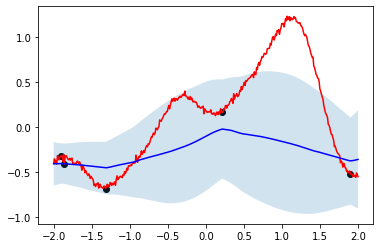

 10%|▉         | 19006/200000 [06:41<1:35:29, 31.59it/s]

Validation loss for the function plotted:                                     0.869


 10%|▉         | 19997/200000 [07:02<57:42, 51.98it/s]  

Mean training loss at epoch 20000 :                         0.662
Mean Validation loss after 20000 equals                     0.75



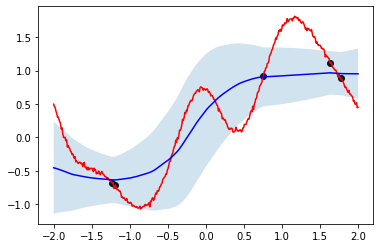

 10%|█         | 20009/200000 [07:02<1:22:40, 36.29it/s]

Validation loss for the function plotted:                                     0.75


 10%|█         | 20999/200000 [07:21<55:18, 53.94it/s]  

Mean training loss at epoch 21000 :                         0.784
Mean Validation loss after 21000 equals                     1.34



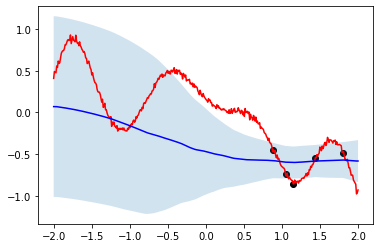

Validation loss for the function plotted:                                     1.34


 11%|█         | 22000/200000 [07:44<57:14, 51.83it/s]  

Mean training loss at epoch 22000 :                         0.499
Mean Validation loss after 22000 equals                     1.069



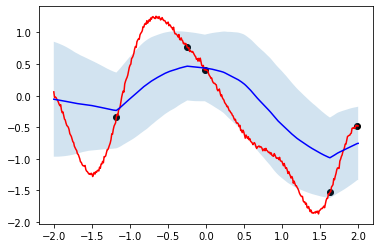

Validation loss for the function plotted:                                     1.069


 11%|█▏        | 22998/200000 [08:04<57:36, 51.21it/s]  

Mean training loss at epoch 23000 :                         0.481
Mean Validation loss after 23000 equals                     0.766



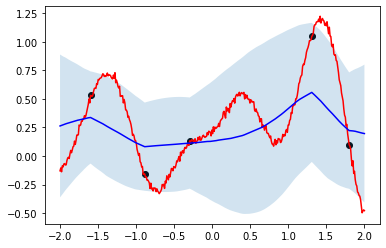

 12%|█▏        | 23010/200000 [08:04<1:17:15, 38.18it/s]

Validation loss for the function plotted:                                     0.766


 12%|█▏        | 23999/200000 [08:25<51:54, 56.50it/s]  

Mean training loss at epoch 24000 :                         0.891
Mean Validation loss after 24000 equals                     1.339



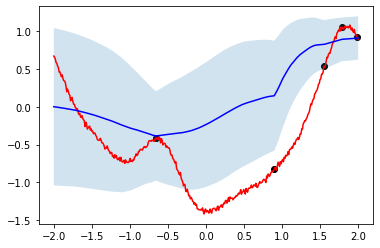

 12%|█▏        | 24011/200000 [08:26<1:14:14, 39.51it/s]

Validation loss for the function plotted:                                     1.339


 12%|█▎        | 25000/200000 [08:46<57:22, 50.84it/s]  

Mean training loss at epoch 25000 :                         0.8
Mean Validation loss after 25000 equals                     1.015



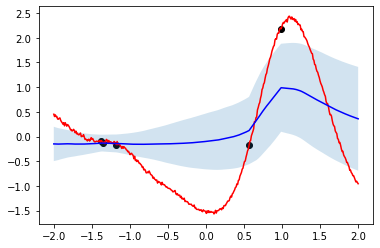

 13%|█▎        | 25006/200000 [08:46<1:27:44, 33.24it/s]

Validation loss for the function plotted:                                     1.015


 13%|█▎        | 25998/200000 [09:08<57:12, 50.70it/s]  

Mean training loss at epoch 26000 :                         0.689
Mean Validation loss after 26000 equals                     0.853



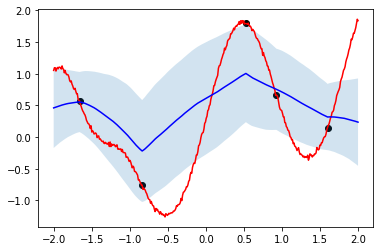

 13%|█▎        | 26009/200000 [09:08<1:24:40, 34.25it/s]

Validation loss for the function plotted:                                     0.853


 13%|█▎        | 26996/200000 [09:28<50:41, 56.88it/s]  

Mean training loss at epoch 27000 :                         0.891
Mean Validation loss after 27000 equals                     0.728



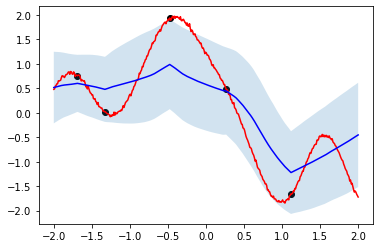

 14%|█▎        | 27008/200000 [09:29<1:16:59, 37.45it/s]

Validation loss for the function plotted:                                     0.728


 14%|█▍        | 27996/200000 [09:49<57:30, 49.85it/s]  

Mean training loss at epoch 28000 :                         1.206
Mean Validation loss after 28000 equals                     0.86



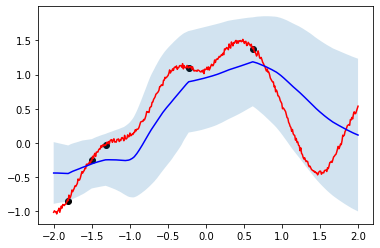

 14%|█▍        | 28006/200000 [09:49<1:23:21, 34.39it/s]

Validation loss for the function plotted:                                     0.86


 14%|█▍        | 28999/200000 [10:09<56:07, 50.78it/s]  

Mean training loss at epoch 29000 :                         0.578
Mean Validation loss after 29000 equals                     1.013



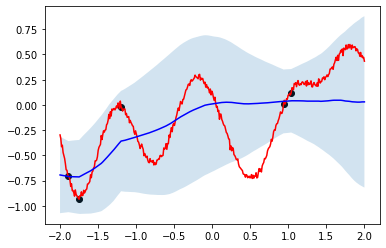

 15%|█▍        | 29011/200000 [10:10<1:17:10, 36.92it/s]

Validation loss for the function plotted:                                     1.013


 15%|█▍        | 29998/200000 [10:30<57:59, 48.85it/s]  

Mean training loss at epoch 30000 :                         0.939
Mean Validation loss after 30000 equals                     1.387



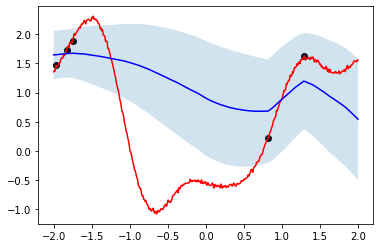

 15%|█▌        | 30003/200000 [10:30<1:36:32, 29.35it/s]

Validation loss for the function plotted:                                     1.387


 16%|█▌        | 31000/200000 [10:51<55:42, 50.57it/s]  

Mean training loss at epoch 31000 :                         0.794
Mean Validation loss after 31000 equals                     0.976



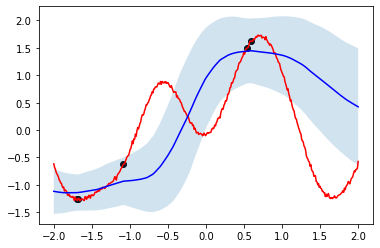

 16%|█▌        | 31006/200000 [10:51<1:27:40, 32.12it/s]

Validation loss for the function plotted:                                     0.976


 16%|█▌        | 32000/200000 [11:12<59:37, 46.96it/s]  

Mean training loss at epoch 32000 :                         0.894
Mean Validation loss after 32000 equals                     0.948



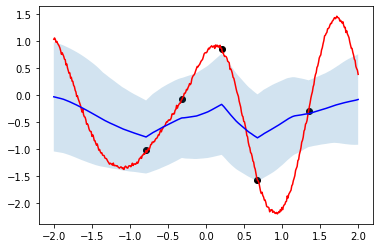

 16%|█▌        | 32011/200000 [11:12<1:30:50, 30.82it/s]

Validation loss for the function plotted:                                     0.948


 16%|█▋        | 32997/200000 [11:33<55:29, 50.15it/s]  

Mean training loss at epoch 33000 :                         0.568
Mean Validation loss after 33000 equals                     1.116



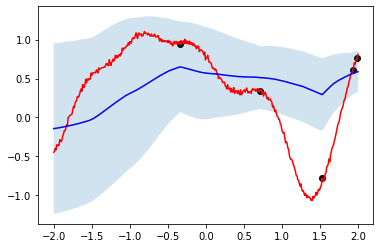

 17%|█▋        | 33009/200000 [11:34<1:21:57, 33.96it/s]

Validation loss for the function plotted:                                     1.116


 17%|█▋        | 34000/200000 [11:54<56:43, 48.78it/s]  

Mean training loss at epoch 34000 :                         0.683
Mean Validation loss after 34000 equals                     1.002



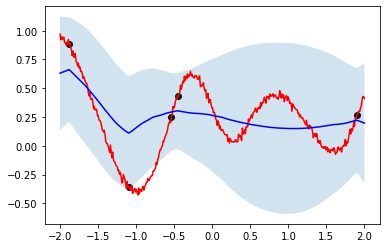

 17%|█▋        | 34010/200000 [11:55<1:22:23, 33.58it/s]

Validation loss for the function plotted:                                     1.002


 17%|█▋        | 34995/200000 [12:15<53:29, 51.41it/s]  

Mean training loss at epoch 35000 :                         0.488
Mean Validation loss after 35000 equals                     0.775



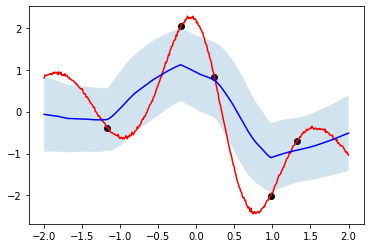

 18%|█▊        | 35001/200000 [12:16<1:20:27, 34.18it/s]

Validation loss for the function plotted:                                     0.775


 18%|█▊        | 35998/200000 [12:36<50:25, 54.20it/s]  

Mean training loss at epoch 36000 :                         0.55
Mean Validation loss after 36000 equals                     1.046



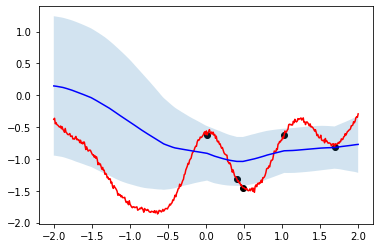

Validation loss for the function plotted:                                     1.046


 18%|█▊        | 36996/200000 [12:57<1:13:04, 37.18it/s]

Mean training loss at epoch 37000 :                         0.596
Mean Validation loss after 37000 equals                     1.176



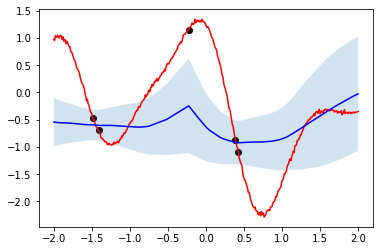

 19%|█▊        | 37001/200000 [12:57<1:39:27, 27.32it/s]

Validation loss for the function plotted:                                     1.176


 19%|█▉        | 37999/200000 [13:20<1:14:29, 36.25it/s]

Mean training loss at epoch 38000 :                         0.36
Mean Validation loss after 38000 equals                     0.682



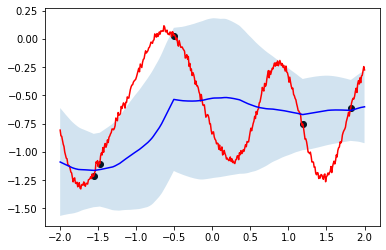

 19%|█▉        | 38010/200000 [13:20<1:30:34, 29.81it/s]

Validation loss for the function plotted:                                     0.682


 19%|█▉        | 38995/200000 [13:41<1:03:00, 42.58it/s]

Mean training loss at epoch 39000 :                         0.89
Mean Validation loss after 39000 equals                     1.12



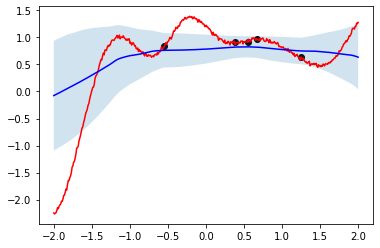

 20%|█▉        | 39006/200000 [13:41<1:19:16, 33.85it/s]

Validation loss for the function plotted:                                     1.12


 20%|█▉        | 39998/200000 [14:02<59:54, 44.52it/s]  

Mean training loss at epoch 40000 :                         0.86
Mean Validation loss after 40000 equals                     1.055



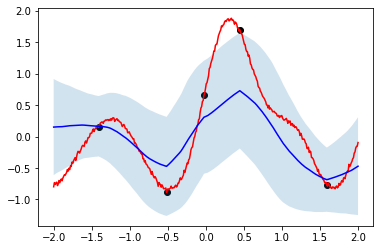

 20%|██        | 40008/200000 [14:02<1:25:39, 31.13it/s]

Validation loss for the function plotted:                                     1.055


 20%|██        | 40996/200000 [14:23<46:16, 57.27it/s]  

Mean training loss at epoch 41000 :                         0.596
Mean Validation loss after 41000 equals                     1.01



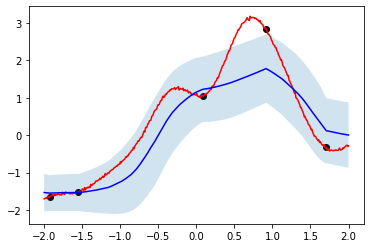

 21%|██        | 41002/200000 [14:23<1:08:29, 38.69it/s]

Validation loss for the function plotted:                                     1.01


 21%|██        | 41997/200000 [14:43<53:50, 48.90it/s]  

Mean training loss at epoch 42000 :                         0.595
Mean Validation loss after 42000 equals                     1.455



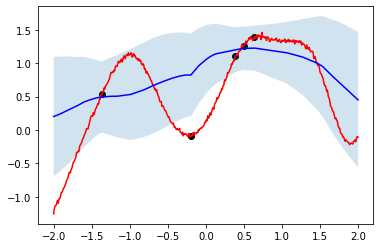

 21%|██        | 42007/200000 [14:44<1:17:23, 34.03it/s]

Validation loss for the function plotted:                                     1.455


 21%|██▏       | 42996/200000 [15:04<44:58, 58.19it/s]  

Mean training loss at epoch 43000 :                         0.974
Mean Validation loss after 43000 equals                     0.977



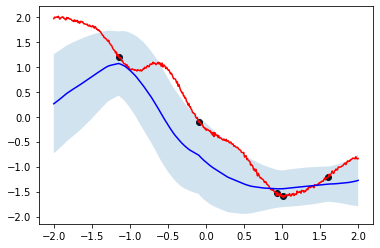

 22%|██▏       | 43007/200000 [15:05<1:09:40, 37.55it/s]

Validation loss for the function plotted:                                     0.977


 22%|██▏       | 44000/200000 [15:25<52:15, 49.75it/s]  

Mean training loss at epoch 44000 :                         0.538
Mean Validation loss after 44000 equals                     1.729



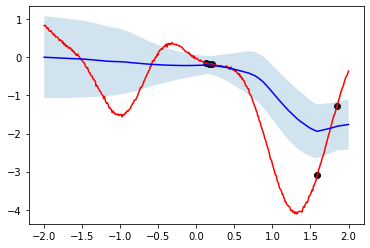

 22%|██▏       | 44009/200000 [15:26<1:19:17, 32.79it/s]

Validation loss for the function plotted:                                     1.729


 22%|██▏       | 44997/200000 [15:45<53:20, 48.43it/s]  

Mean training loss at epoch 45000 :                         0.592
Mean Validation loss after 45000 equals                     1.054



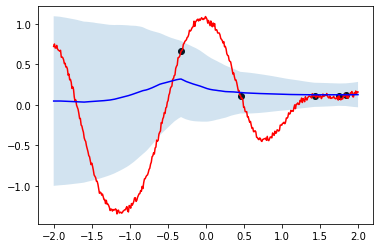

 23%|██▎       | 45007/200000 [15:46<1:30:52, 28.43it/s]

Validation loss for the function plotted:                                     1.054


 23%|██▎       | 46000/200000 [16:07<51:58, 49.38it/s]  

Mean training loss at epoch 46000 :                         1.409
Mean Validation loss after 46000 equals                     0.834



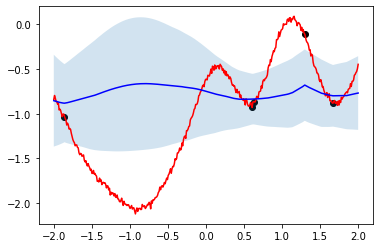

 23%|██▎       | 46010/200000 [16:07<1:19:09, 32.42it/s]

Validation loss for the function plotted:                                     0.834


 24%|██▎       | 47000/200000 [16:32<51:24, 49.61it/s]  

Mean training loss at epoch 47000 :                         0.576
Mean Validation loss after 47000 equals                     1.103



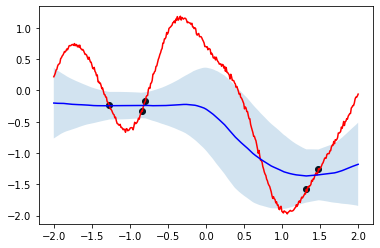

 24%|██▎       | 47005/200000 [16:32<1:26:47, 29.38it/s]

Validation loss for the function plotted:                                     1.103


 24%|██▍       | 47998/200000 [16:52<53:08, 47.66it/s]  

Mean training loss at epoch 48000 :                         0.675
Mean Validation loss after 48000 equals                     0.845



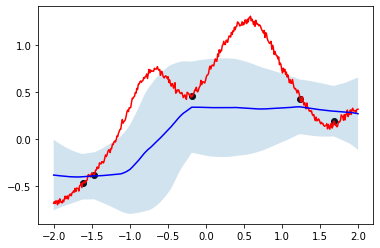

 24%|██▍       | 48010/200000 [16:53<1:12:34, 34.90it/s]

Validation loss for the function plotted:                                     0.845


 24%|██▍       | 48998/200000 [17:16<1:24:43, 29.70it/s]

Mean training loss at epoch 49000 :                         0.859
Mean Validation loss after 49000 equals                     0.934



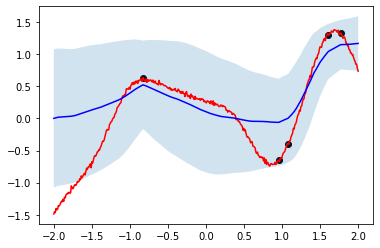

 25%|██▍       | 49005/200000 [17:17<2:16:00, 18.50it/s]

Validation loss for the function plotted:                                     0.934


 25%|██▍       | 49999/200000 [17:48<1:49:15, 22.88it/s]

Mean training loss at epoch 50000 :                         0.663
Mean Validation loss after 50000 equals                     0.73



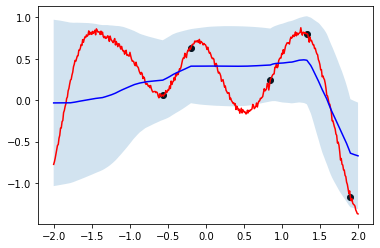

 25%|██▌       | 50006/200000 [17:48<2:25:20, 17.20it/s]

Validation loss for the function plotted:                                     0.73


 25%|██▌       | 50999/200000 [18:13<1:09:43, 35.62it/s]

Mean training loss at epoch 51000 :                         0.229
Mean Validation loss after 51000 equals                     0.817



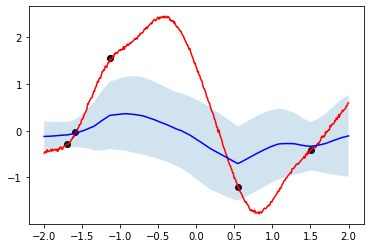

 26%|██▌       | 51007/200000 [18:14<1:40:44, 24.65it/s]

Validation loss for the function plotted:                                     0.817


 26%|██▌       | 51998/200000 [18:35<53:15, 46.32it/s]  

Mean training loss at epoch 52000 :                         0.534
Mean Validation loss after 52000 equals                     1.057



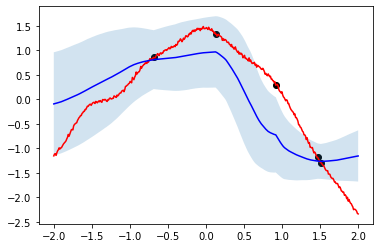

 26%|██▌       | 52008/200000 [18:35<1:18:33, 31.40it/s]

Validation loss for the function plotted:                                     1.057


 26%|██▋       | 52996/200000 [19:01<1:05:43, 37.28it/s]

Mean training loss at epoch 53000 :                         0.237
Mean Validation loss after 53000 equals                     1.192



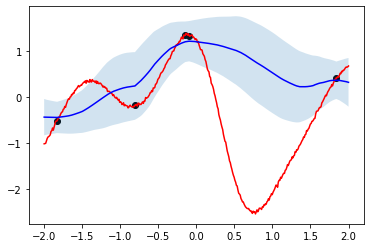

 27%|██▋       | 53006/200000 [19:02<1:26:02, 28.47it/s]

Validation loss for the function plotted:                                     1.192


 27%|██▋       | 53998/200000 [19:23<56:01, 43.44it/s]  

Mean training loss at epoch 54000 :                         0.624
Mean Validation loss after 54000 equals                     1.436



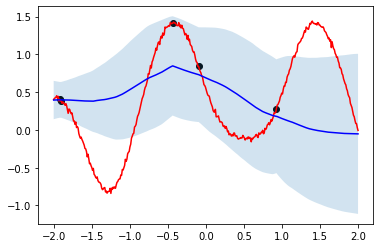

 27%|██▋       | 54008/200000 [19:24<1:17:18, 31.48it/s]

Validation loss for the function plotted:                                     1.436


 27%|██▋       | 54996/200000 [19:44<51:37, 46.81it/s]  

Mean training loss at epoch 55000 :                         0.82
Mean Validation loss after 55000 equals                     1.843



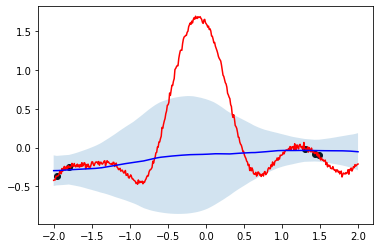

 28%|██▊       | 55006/200000 [19:44<1:11:26, 33.83it/s]

Validation loss for the function plotted:                                     1.843


 28%|██▊       | 55996/200000 [20:09<55:57, 42.89it/s]  

Mean training loss at epoch 56000 :                         0.826
Mean Validation loss after 56000 equals                     1.868



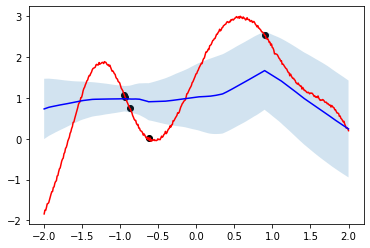

 28%|██▊       | 56006/200000 [20:10<1:15:26, 31.81it/s]

Validation loss for the function plotted:                                     1.868


 28%|██▊       | 56996/200000 [20:30<51:42, 46.10it/s]  

Mean training loss at epoch 57000 :                         0.474
Mean Validation loss after 57000 equals                     1.259



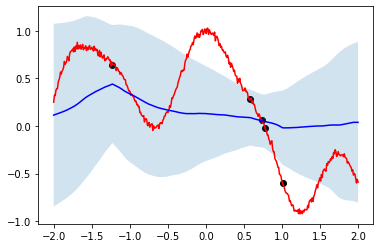

 29%|██▊       | 57006/200000 [20:31<1:12:55, 32.68it/s]

Validation loss for the function plotted:                                     1.259


 29%|██▉       | 57999/200000 [20:53<48:15, 49.05it/s]  

Mean training loss at epoch 58000 :                         0.614
Mean Validation loss after 58000 equals                     0.932



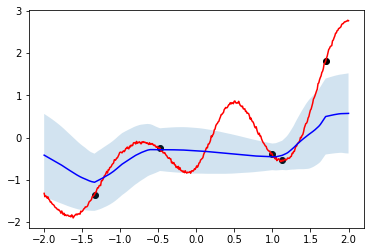

 29%|██▉       | 58008/200000 [20:53<1:13:36, 32.15it/s]

Validation loss for the function plotted:                                     0.932


 29%|██▉       | 58999/200000 [21:25<52:33, 44.72it/s]  

Mean training loss at epoch 59000 :                         0.33
Mean Validation loss after 59000 equals                     0.863



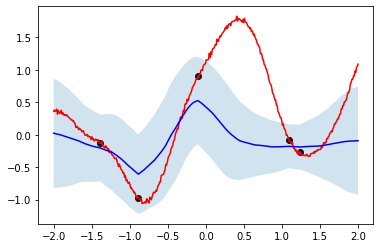

 30%|██▉       | 59010/200000 [21:25<1:23:44, 28.06it/s]

Validation loss for the function plotted:                                     0.863


 30%|███       | 60000/200000 [21:55<1:00:31, 38.55it/s]

Mean training loss at epoch 60000 :                         0.549
Mean Validation loss after 60000 equals                     0.776



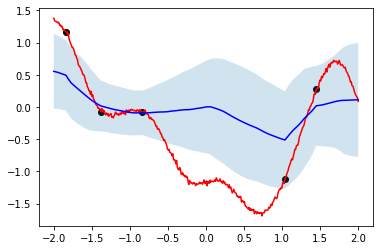

Validation loss for the function plotted:                                     0.776


 30%|███       | 60996/200000 [22:26<1:39:16, 23.34it/s]

Mean training loss at epoch 61000 :                         0.937
Mean Validation loss after 61000 equals                     1.131



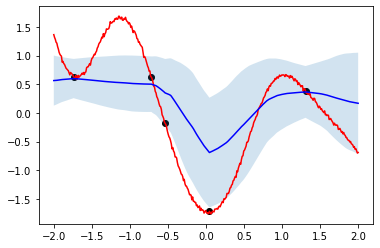

 31%|███       | 61006/200000 [22:26<1:37:04, 23.86it/s]

Validation loss for the function plotted:                                     1.131


 31%|███       | 61996/200000 [22:56<51:51, 44.35it/s]  

Mean training loss at epoch 62000 :                         0.69
Mean Validation loss after 62000 equals                     0.897



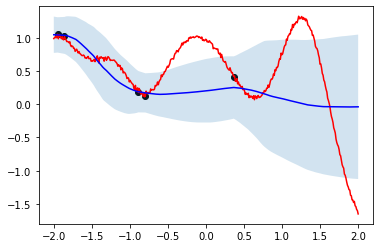

 31%|███       | 62001/200000 [22:57<3:04:51, 12.44it/s]

Validation loss for the function plotted:                                     0.897


 31%|███▏      | 62998/200000 [23:19<44:48, 50.96it/s]  

Mean training loss at epoch 63000 :                         0.504
Mean Validation loss after 63000 equals                     1.246



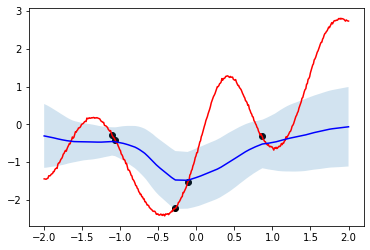

 32%|███▏      | 63010/200000 [23:19<1:01:50, 36.92it/s]

Validation loss for the function plotted:                                     1.246


 32%|███▏      | 63995/200000 [23:39<43:44, 51.83it/s]  

Mean training loss at epoch 64000 :                         0.818
Mean Validation loss after 64000 equals                     1.22



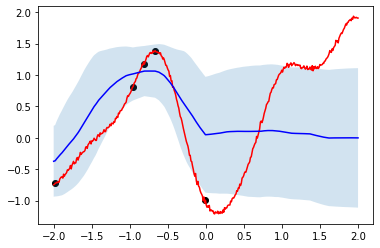

 32%|███▏      | 64006/200000 [23:39<1:02:09, 36.47it/s]

Validation loss for the function plotted:                                     1.22


 32%|███▏      | 64997/200000 [23:59<47:59, 46.88it/s]  

Mean training loss at epoch 65000 :                         0.357
Mean Validation loss after 65000 equals                     1.224



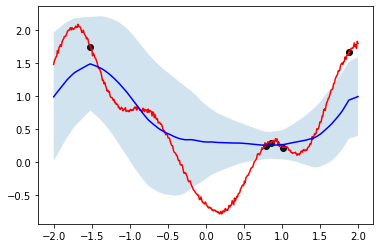

 33%|███▎      | 65008/200000 [23:59<1:06:29, 33.84it/s]

Validation loss for the function plotted:                                     1.224


 33%|███▎      | 65996/200000 [24:20<39:18, 56.82it/s]  

Mean training loss at epoch 66000 :                         0.453
Mean Validation loss after 66000 equals                     0.88



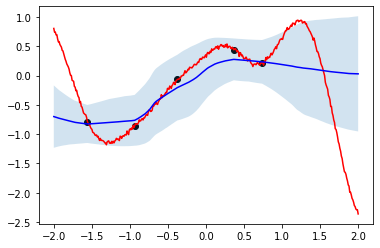

 33%|███▎      | 66002/200000 [24:20<58:53, 37.92it/s]

Validation loss for the function plotted:                                     0.88


 33%|███▎      | 66996/200000 [24:40<46:04, 48.12it/s]  

Mean training loss at epoch 67000 :                         0.551
Mean Validation loss after 67000 equals                     0.849



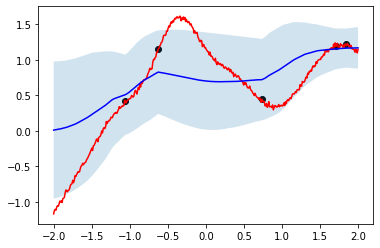

 34%|███▎      | 67006/200000 [24:40<1:06:04, 33.55it/s]

Validation loss for the function plotted:                                     0.849


 34%|███▍      | 68000/200000 [25:02<49:50, 44.15it/s]  

Mean training loss at epoch 68000 :                         0.419
Mean Validation loss after 68000 equals                     1.241



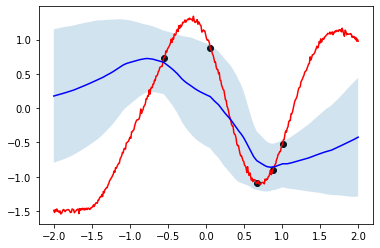

 34%|███▍      | 68005/200000 [25:02<1:22:58, 26.52it/s]

Validation loss for the function plotted:                                     1.241


 34%|███▍      | 68997/200000 [25:24<42:54, 50.89it/s]  

Mean training loss at epoch 69000 :                         0.498
Mean Validation loss after 69000 equals                     0.94



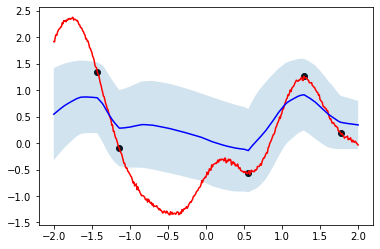

 35%|███▍      | 69008/200000 [25:25<1:01:47, 35.33it/s]

Validation loss for the function plotted:                                     0.94


 35%|███▍      | 69995/200000 [25:47<48:57, 44.26it/s]  

Mean training loss at epoch 70000 :                         0.712
Mean Validation loss after 70000 equals                     0.946



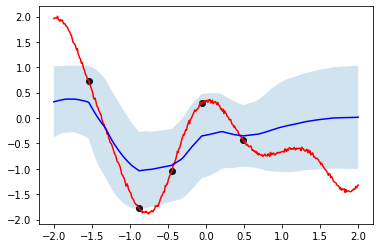

 35%|███▌      | 70001/200000 [25:47<1:06:23, 32.64it/s]

Validation loss for the function plotted:                                     0.946


 35%|███▌      | 70996/200000 [26:16<53:07, 40.48it/s]  

Mean training loss at epoch 71000 :                         0.551
Mean Validation loss after 71000 equals                     0.719



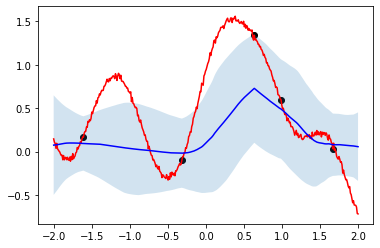

 36%|███▌      | 71006/200000 [26:16<1:09:14, 31.05it/s]

Validation loss for the function plotted:                                     0.719


 36%|███▌      | 71999/200000 [26:40<41:17, 51.67it/s]  

Mean training loss at epoch 72000 :                         1.141
Mean Validation loss after 72000 equals                     1.027



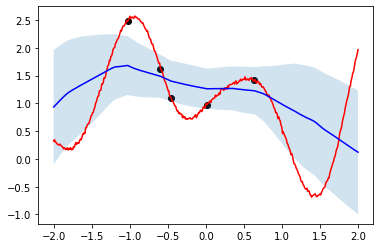

 36%|███▌      | 72005/200000 [26:41<1:13:14, 29.12it/s]

Validation loss for the function plotted:                                     1.027


 36%|███▋      | 72999/200000 [27:08<51:12, 41.34it/s]  

Mean training loss at epoch 73000 :                         0.636
Mean Validation loss after 73000 equals                     1.415



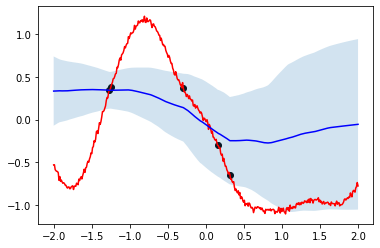

 37%|███▋      | 73010/200000 [27:09<1:03:30, 33.32it/s]

Validation loss for the function plotted:                                     1.415


 37%|███▋      | 73996/200000 [27:32<39:17, 53.44it/s]  

Mean training loss at epoch 74000 :                         0.403
Mean Validation loss after 74000 equals                     0.83



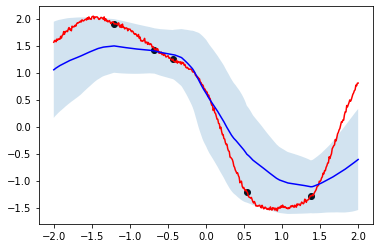

 37%|███▋      | 74002/200000 [27:33<55:44, 37.67it/s]

Validation loss for the function plotted:                                     0.83


 37%|███▋      | 74998/200000 [27:53<43:13, 48.20it/s]  

Mean training loss at epoch 75000 :                         0.493
Mean Validation loss after 75000 equals                     1.318



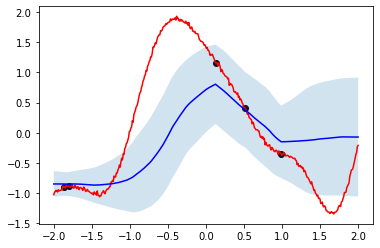

 38%|███▊      | 75009/200000 [27:54<1:01:09, 34.07it/s]

Validation loss for the function plotted:                                     1.318


 38%|███▊      | 75998/200000 [28:15<42:29, 48.64it/s]  

Mean training loss at epoch 76000 :                         0.394
Mean Validation loss after 76000 equals                     1.208



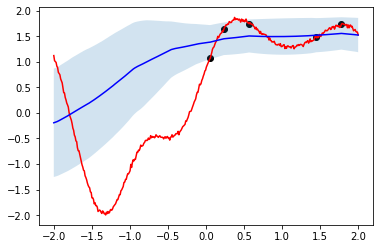

 38%|███▊      | 76009/200000 [28:16<1:00:31, 34.14it/s]

Validation loss for the function plotted:                                     1.208


 38%|███▊      | 76997/200000 [28:38<35:08, 58.33it/s]  

Mean training loss at epoch 77000 :                         0.823
Mean Validation loss after 77000 equals                     1.067



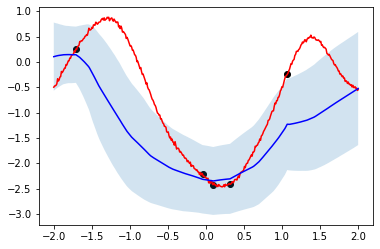

Validation loss for the function plotted:                                     1.067


 39%|███▉      | 77996/200000 [29:11<47:58, 42.39it/s]  

Mean training loss at epoch 78000 :                         0.855
Mean Validation loss after 78000 equals                     0.85



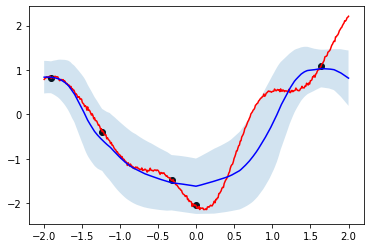

 39%|███▉      | 78005/200000 [29:11<1:20:27, 25.27it/s]

Validation loss for the function plotted:                                     0.85


 39%|███▉      | 78996/200000 [29:35<44:56, 44.88it/s]  

Mean training loss at epoch 79000 :                         0.876
Mean Validation loss after 79000 equals                     0.872



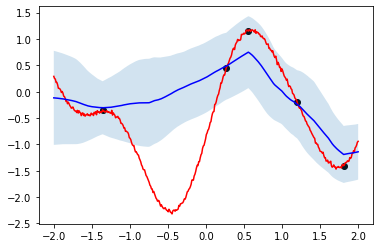

 40%|███▉      | 79006/200000 [29:36<1:02:05, 32.48it/s]

Validation loss for the function plotted:                                     0.872


 40%|████      | 80000/200000 [30:03<41:09, 48.59it/s]  

Mean training loss at epoch 80000 :                         0.343
Mean Validation loss after 80000 equals                     0.859



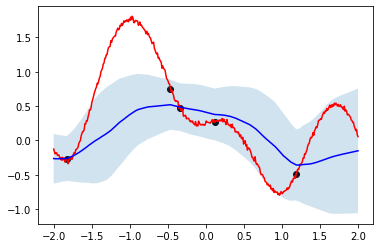

 40%|████      | 80005/200000 [30:03<1:10:35, 28.33it/s]

Validation loss for the function plotted:                                     0.859


 40%|████      | 80997/200000 [30:28<1:15:28, 26.28it/s]

Mean training loss at epoch 81000 :                         1.118
Mean Validation loss after 81000 equals                     0.901



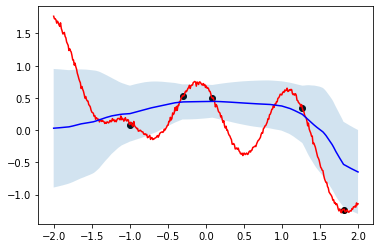

 41%|████      | 81006/200000 [30:29<1:26:02, 23.05it/s]

Validation loss for the function plotted:                                     0.901


 41%|████      | 81999/200000 [30:53<53:19, 36.88it/s]  

Mean training loss at epoch 82000 :                         0.528
Mean Validation loss after 82000 equals                     1.288



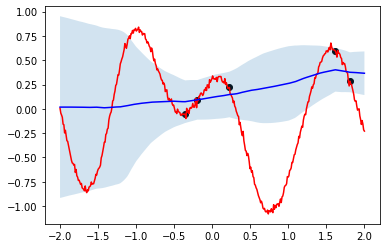

 41%|████      | 82008/200000 [30:54<1:14:25, 26.43it/s]

Validation loss for the function plotted:                                     1.288


 41%|████▏     | 82995/200000 [31:23<41:07, 47.42it/s]  

Mean training loss at epoch 83000 :                         0.564
Mean Validation loss after 83000 equals                     0.994



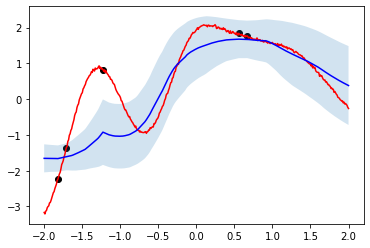

 42%|████▏     | 83006/200000 [31:23<57:33, 33.88it/s]  

Validation loss for the function plotted:                                     0.994


 42%|████▏     | 83998/200000 [31:51<59:08, 32.69it/s]  

Mean training loss at epoch 84000 :                         0.659
Mean Validation loss after 84000 equals                     1.315



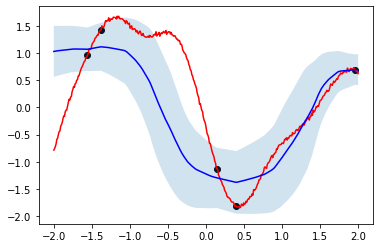

 42%|████▏     | 84007/200000 [31:51<1:23:09, 23.25it/s]

Validation loss for the function plotted:                                     1.315


 42%|████▏     | 84998/200000 [32:27<1:03:57, 29.97it/s]

Mean training loss at epoch 85000 :                         0.727
Mean Validation loss after 85000 equals                     1.549



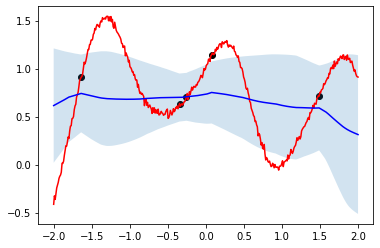

 43%|████▎     | 85002/200000 [32:27<2:37:07, 12.20it/s]

Validation loss for the function plotted:                                     1.549


 43%|████▎     | 85997/200000 [32:50<47:10, 40.28it/s]  

Mean training loss at epoch 86000 :                         0.911
Mean Validation loss after 86000 equals                     0.899



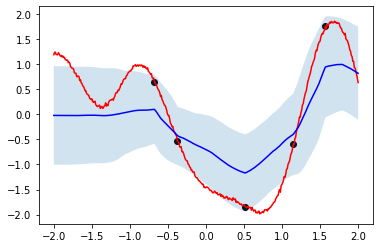

 43%|████▎     | 86009/200000 [32:50<58:19, 32.57it/s]  

Validation loss for the function plotted:                                     0.899


 43%|████▎     | 86997/200000 [33:14<33:57, 55.45it/s]  

Mean training loss at epoch 87000 :                         0.447
Mean Validation loss after 87000 equals                     1.161



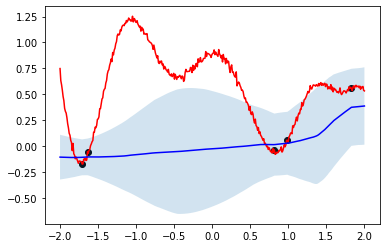

 44%|████▎     | 87003/200000 [33:15<58:18, 32.29it/s]

Validation loss for the function plotted:                                     1.161


 44%|████▍     | 87999/200000 [33:40<45:48, 40.75it/s]  

Mean training loss at epoch 88000 :                         0.608
Mean Validation loss after 88000 equals                     0.94



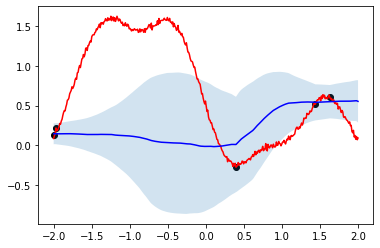

Validation loss for the function plotted:                                     0.94


 44%|████▍     | 88998/200000 [34:04<45:37, 40.55it/s]  

Mean training loss at epoch 89000 :                         0.615
Mean Validation loss after 89000 equals                     0.952



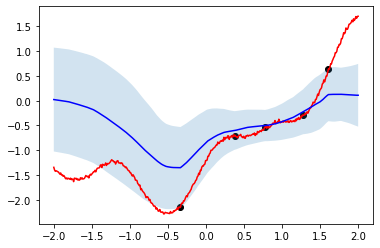

 45%|████▍     | 89003/200000 [34:04<1:12:03, 25.67it/s]

Validation loss for the function plotted:                                     0.952


 45%|████▍     | 89997/200000 [34:33<39:42, 46.17it/s]  

Mean training loss at epoch 90000 :                         0.718
Mean Validation loss after 90000 equals                     0.963



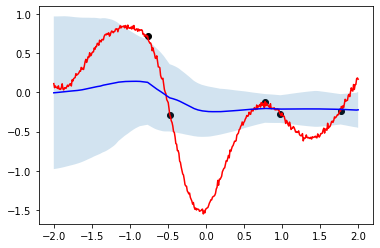

 45%|████▌     | 90007/200000 [34:34<1:01:42, 29.71it/s]

Validation loss for the function plotted:                                     0.963


 45%|████▌     | 90998/200000 [34:59<1:04:41, 28.08it/s]

Mean training loss at epoch 91000 :                         0.532
Mean Validation loss after 91000 equals                     0.871



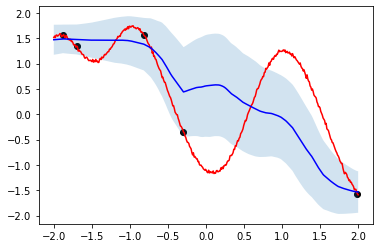

 46%|████▌     | 91007/200000 [34:59<1:18:21, 23.18it/s]

Validation loss for the function plotted:                                     0.871


 46%|████▌     | 91996/200000 [35:50<1:05:24, 27.52it/s] 

Mean training loss at epoch 92000 :                         0.688
Mean Validation loss after 92000 equals                     0.742



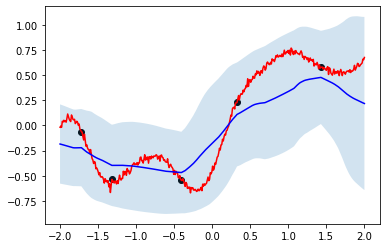

 46%|████▌     | 92005/200000 [35:51<1:14:55, 24.02it/s]

Validation loss for the function plotted:                                     0.742


 46%|████▋     | 92998/200000 [36:26<52:42, 33.83it/s]  

Mean training loss at epoch 93000 :                         0.863
Mean Validation loss after 93000 equals                     0.745



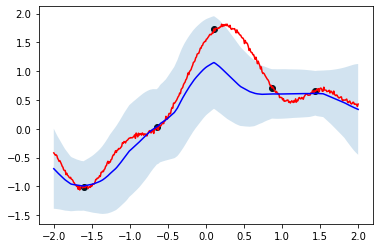

 47%|████▋     | 93007/200000 [36:26<1:09:33, 25.64it/s]

Validation loss for the function plotted:                                     0.745


 47%|████▋     | 93997/200000 [36:56<57:20, 30.81it/s]  

Mean training loss at epoch 94000 :                         0.297
Mean Validation loss after 94000 equals                     1.268



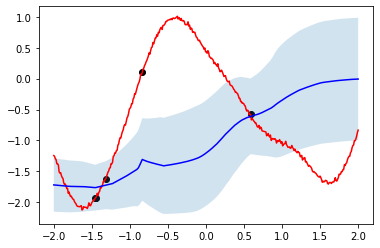

 47%|████▋     | 94005/200000 [36:56<1:26:31, 20.42it/s]

Validation loss for the function plotted:                                     1.268


 48%|████▊     | 95000/200000 [37:35<2:11:12, 13.34it/s]

Mean training loss at epoch 95000 :                         0.466
Mean Validation loss after 95000 equals                     1.131



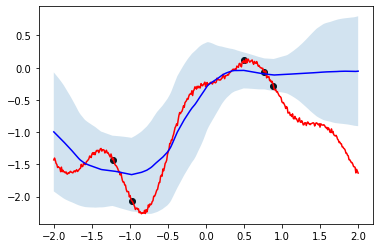

 48%|████▊     | 95002/200000 [37:36<3:33:45,  8.19it/s]

Validation loss for the function plotted:                                     1.131


 48%|████▊     | 96000/200000 [38:07<2:18:09, 12.55it/s]

Mean training loss at epoch 96000 :                         0.583
Mean Validation loss after 96000 equals                     0.959



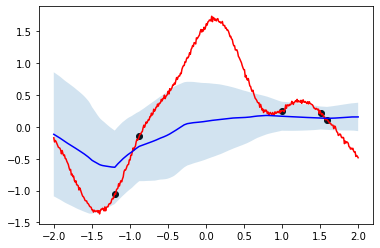

 48%|████▊     | 96003/200000 [38:07<3:05:49,  9.33it/s]

Validation loss for the function plotted:                                     0.959


 48%|████▊     | 96998/200000 [38:45<35:48, 47.93it/s]  

Mean training loss at epoch 97000 :                         0.558
Mean Validation loss after 97000 equals                     0.708



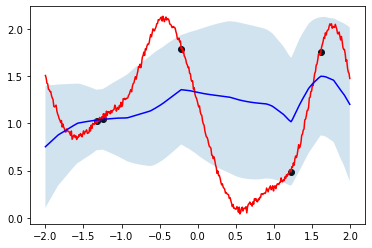

Validation loss for the function plotted:                                     0.708


 49%|████▉     | 97998/200000 [39:13<34:31, 49.24it/s]  

Mean training loss at epoch 98000 :                         0.527
Mean Validation loss after 98000 equals                     1.059



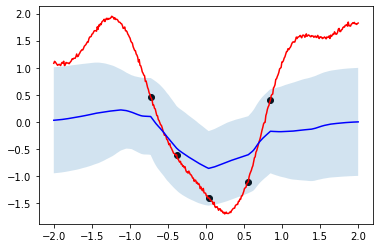

 49%|████▉     | 98009/200000 [39:14<1:05:58, 25.77it/s]

Validation loss for the function plotted:                                     1.059


 49%|████▉     | 98998/200000 [39:37<41:06, 40.95it/s]  

Mean training loss at epoch 99000 :                         0.558
Mean Validation loss after 99000 equals                     1.245



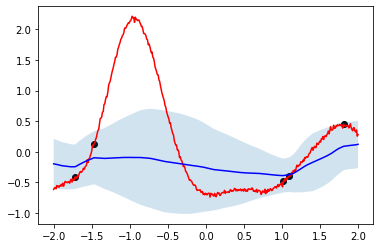

 50%|████▉     | 99009/200000 [39:37<52:36, 31.99it/s]  

Validation loss for the function plotted:                                     1.245


 50%|████▉     | 99998/200000 [40:11<36:58, 45.08it/s]  

Mean training loss at epoch 100000 :                         0.511
Mean Validation loss after 100000 equals                     0.928



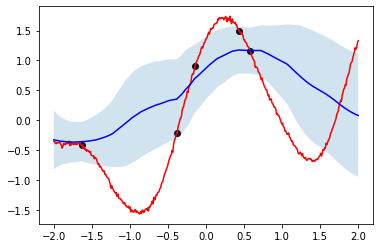

 50%|█████     | 100007/200000 [40:12<57:09, 29.16it/s]  

Validation loss for the function plotted:                                     0.928


 50%|█████     | 100999/200000 [40:33<31:59, 51.59it/s]

Mean training loss at epoch 101000 :                         0.48
Mean Validation loss after 101000 equals                     0.78



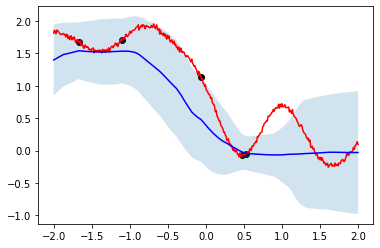

 51%|█████     | 101010/200000 [40:33<44:53, 36.75it/s]

Validation loss for the function plotted:                                     0.78


 51%|█████     | 101997/200000 [40:53<33:14, 49.14it/s]

Mean training loss at epoch 102000 :                         0.959
Mean Validation loss after 102000 equals                     1.527



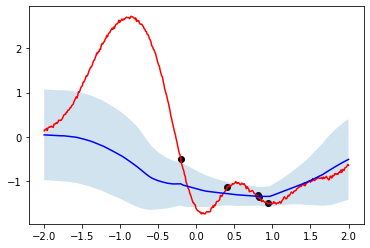

 51%|█████     | 102007/200000 [40:54<48:20, 33.79it/s]

Validation loss for the function plotted:                                     1.527


 51%|█████▏    | 102996/200000 [41:14<34:49, 46.43it/s]

Mean training loss at epoch 103000 :                         0.815
Mean Validation loss after 103000 equals                     1.24



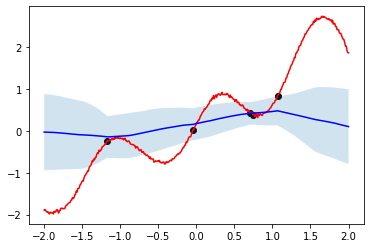

 52%|█████▏    | 103006/200000 [41:14<51:48, 31.21it/s]

Validation loss for the function plotted:                                     1.24


 52%|█████▏    | 103996/200000 [41:34<34:46, 46.01it/s]

Mean training loss at epoch 104000 :                         0.425
Mean Validation loss after 104000 equals                     1.474



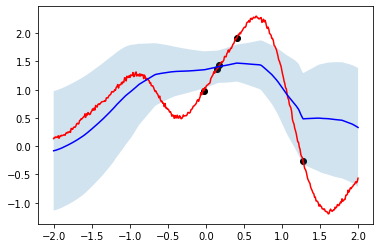

 52%|█████▏    | 104001/200000 [41:34<47:36, 33.61it/s]

Validation loss for the function plotted:                                     1.474


 52%|█████▏    | 104996/200000 [41:54<31:14, 50.69it/s]

Mean training loss at epoch 105000 :                         0.45
Mean Validation loss after 105000 equals                     0.94



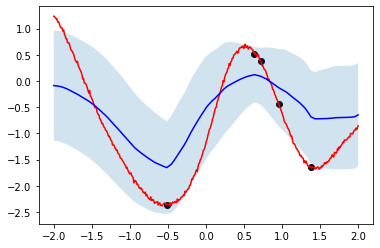

Validation loss for the function plotted:                                     0.94


 53%|█████▎    | 105999/200000 [42:14<31:39, 49.48it/s]

Mean training loss at epoch 106000 :                         0.909
Mean Validation loss after 106000 equals                     1.09



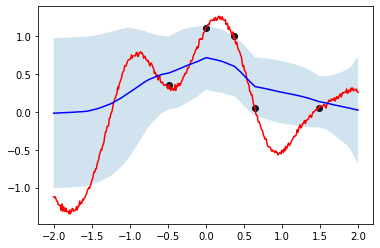

Validation loss for the function plotted:                                     1.09


 54%|█████▎    | 107000/200000 [42:41<35:03, 44.20it/s]  

Mean training loss at epoch 107000 :                         0.568
Mean Validation loss after 107000 equals                     0.722



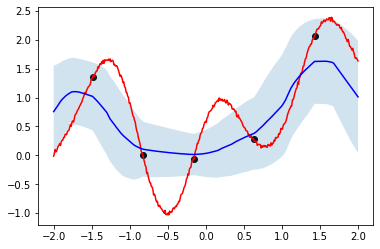

 54%|█████▎    | 107005/200000 [42:41<57:32, 26.94it/s]

Validation loss for the function plotted:                                     0.722


 54%|█████▍    | 107998/200000 [43:03<31:23, 48.84it/s]  

Mean training loss at epoch 108000 :                         0.391
Mean Validation loss after 108000 equals                     0.874



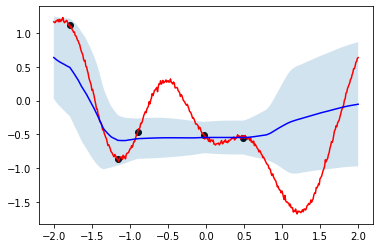

Validation loss for the function plotted:                                     0.874


 54%|█████▍    | 108997/200000 [43:27<1:50:22, 13.74it/s]

Mean training loss at epoch 109000 :                         0.685
Mean Validation loss after 109000 equals                     0.773



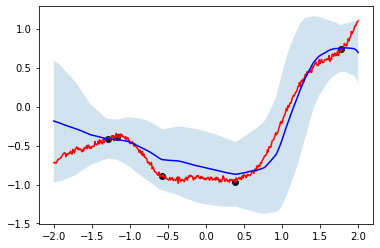

 55%|█████▍    | 109006/200000 [43:28<1:46:25, 14.25it/s]

Validation loss for the function plotted:                                     0.773


 55%|█████▍    | 109996/200000 [43:51<28:13, 53.15it/s]  

Mean training loss at epoch 110000 :                         0.935
Mean Validation loss after 110000 equals                     0.834



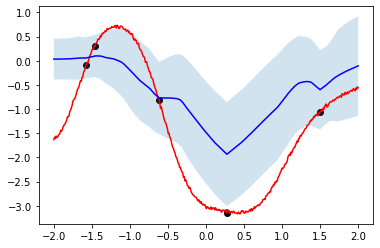

 55%|█████▌    | 110008/200000 [43:51<38:47, 38.66it/s]

Validation loss for the function plotted:                                     0.834


 56%|█████▌    | 111000/200000 [44:10<27:18, 54.30it/s]

Mean training loss at epoch 111000 :                         1.035
Mean Validation loss after 111000 equals                     0.942



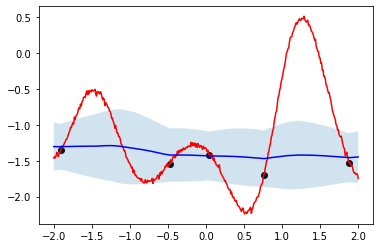

 56%|█████▌    | 111006/200000 [44:10<1:00:15, 24.61it/s]

Validation loss for the function plotted:                                     0.942


 56%|█████▌    | 111999/200000 [44:29<29:04, 50.46it/s]  

Mean training loss at epoch 112000 :                         0.205
Mean Validation loss after 112000 equals                     0.803



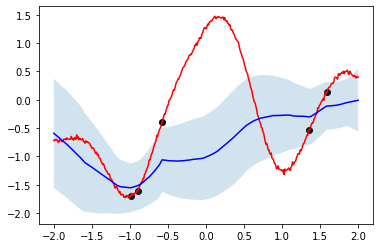

 56%|█████▌    | 112011/200000 [44:30<39:56, 36.72it/s]

Validation loss for the function plotted:                                     0.803


 56%|█████▋    | 112994/200000 [44:48<24:37, 58.87it/s]

Mean training loss at epoch 113000 :                         0.345
Mean Validation loss after 113000 equals                     1.099



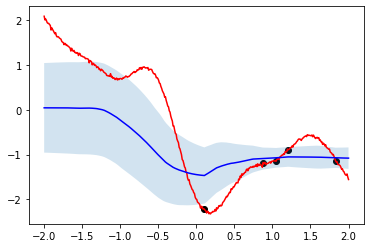

 57%|█████▋    | 113001/200000 [44:49<35:15, 41.12it/s]

Validation loss for the function plotted:                                     1.099


 57%|█████▋    | 113999/200000 [45:09<29:49, 48.05it/s]

Mean training loss at epoch 114000 :                         0.385
Mean Validation loss after 114000 equals                     0.919



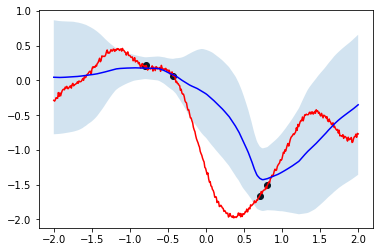

Validation loss for the function plotted:                                     0.919


 57%|█████▋    | 114998/200000 [45:29<27:37, 51.28it/s]

Mean training loss at epoch 115000 :                         0.709
Mean Validation loss after 115000 equals                     0.942



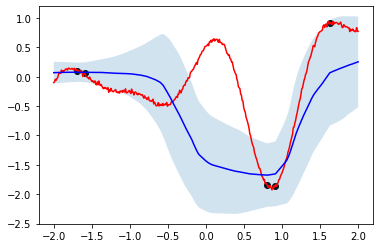

Validation loss for the function plotted:                                     0.942


 58%|█████▊    | 115999/200000 [45:49<27:42, 50.53it/s]

Mean training loss at epoch 116000 :                         0.993
Mean Validation loss after 116000 equals                     0.922



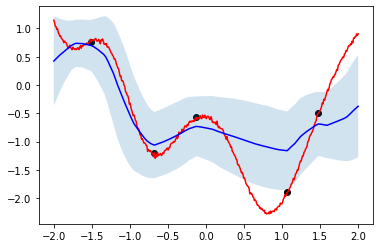

 58%|█████▊    | 116005/200000 [45:49<43:47, 31.97it/s]

Validation loss for the function plotted:                                     0.922


 58%|█████▊    | 116997/200000 [46:09<29:01, 47.65it/s]

Mean training loss at epoch 117000 :                         0.762
Mean Validation loss after 117000 equals                     0.836



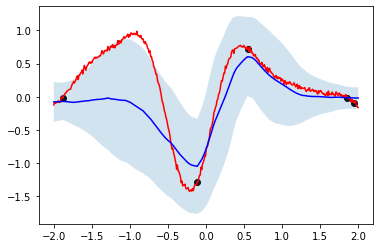

 59%|█████▊    | 117007/200000 [46:09<41:56, 32.98it/s]

Validation loss for the function plotted:                                     0.836


 59%|█████▉    | 117997/200000 [46:31<27:03, 50.50it/s]  

Mean training loss at epoch 118000 :                         0.619
Mean Validation loss after 118000 equals                     0.761



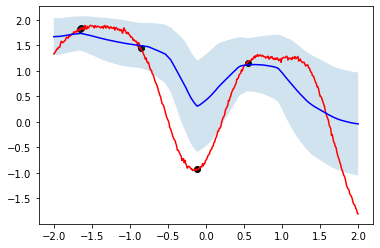

 59%|█████▉    | 118009/200000 [46:31<38:01, 35.93it/s]

Validation loss for the function plotted:                                     0.761


 60%|█████▉    | 119000/200000 [46:51<26:35, 50.75it/s]

Mean training loss at epoch 119000 :                         0.519
Mean Validation loss after 119000 equals                     1.073



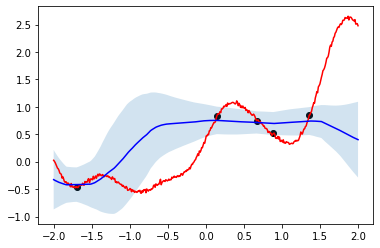

 60%|█████▉    | 119006/200000 [46:51<41:12, 32.76it/s]

Validation loss for the function plotted:                                     1.073


 60%|██████    | 120000/200000 [47:11<26:06, 51.06it/s]

Mean training loss at epoch 120000 :                         0.621
Mean Validation loss after 120000 equals                     0.923



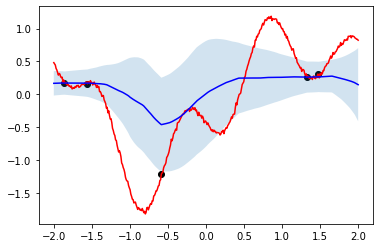

 60%|██████    | 120006/200000 [47:12<39:24, 33.83it/s]

Validation loss for the function plotted:                                     0.923


 60%|██████    | 121000/200000 [47:32<27:06, 48.56it/s]

Mean training loss at epoch 121000 :                         0.446
Mean Validation loss after 121000 equals                     1.176



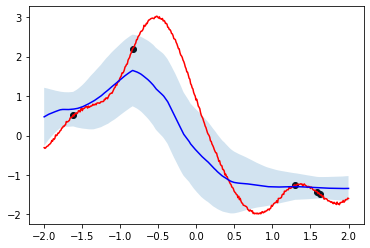

 61%|██████    | 121005/200000 [47:32<48:23, 27.21it/s]

Validation loss for the function plotted:                                     1.176


 61%|██████    | 121997/200000 [47:51<25:07, 51.74it/s]

Mean training loss at epoch 122000 :                         0.667
Mean Validation loss after 122000 equals                     1.289



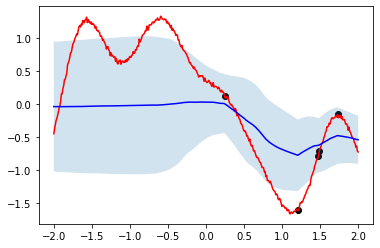

Validation loss for the function plotted:                                     1.289


 61%|██████▏   | 122996/200000 [48:11<24:35, 52.18it/s]

Mean training loss at epoch 123000 :                         0.473
Mean Validation loss after 123000 equals                     1.079



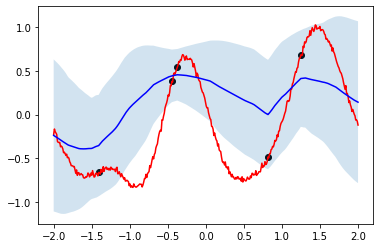

Validation loss for the function plotted:                                     1.079


 62%|██████▏   | 123997/200000 [48:35<21:17, 59.50it/s]  

Mean training loss at epoch 124000 :                         1.103
Mean Validation loss after 124000 equals                     1.27



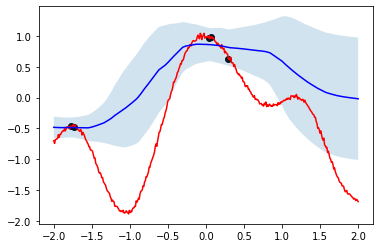

 62%|██████▏   | 124009/200000 [48:36<35:56, 35.24it/s]

Validation loss for the function plotted:                                     1.27


 62%|██████▎   | 125000/200000 [48:55<25:19, 49.35it/s]

Mean training loss at epoch 125000 :                         0.584
Mean Validation loss after 125000 equals                     0.783



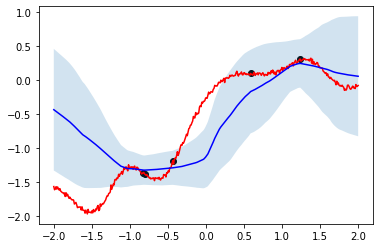

 63%|██████▎   | 125010/200000 [48:56<36:54, 33.86it/s]

Validation loss for the function plotted:                                     0.783


 63%|██████▎   | 126000/200000 [49:16<24:24, 50.52it/s]

Mean training loss at epoch 126000 :                         1.022
Mean Validation loss after 126000 equals                     0.849



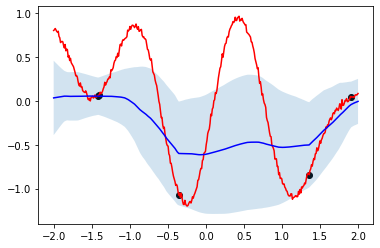

Validation loss for the function plotted:                                     0.849


 63%|██████▎   | 126999/200000 [49:36<23:37, 51.50it/s]

Mean training loss at epoch 127000 :                         0.621
Mean Validation loss after 127000 equals                     1.043



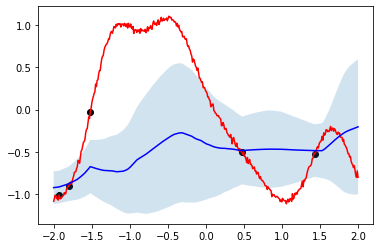

Validation loss for the function plotted:                                     1.043


 64%|██████▍   | 127997/200000 [49:56<24:36, 48.78it/s]

Mean training loss at epoch 128000 :                         0.393
Mean Validation loss after 128000 equals                     0.596



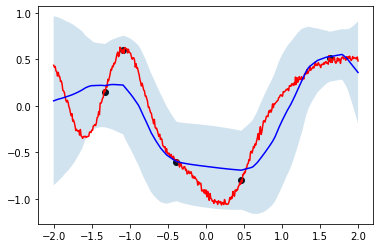

Validation loss for the function plotted:                                     0.596


 64%|██████▍   | 128998/200000 [50:20<36:38, 32.29it/s]  

Mean training loss at epoch 129000 :                         0.691
Mean Validation loss after 129000 equals                     1.036



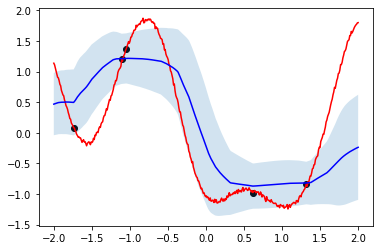

 65%|██████▍   | 129006/200000 [50:21<58:38, 20.18it/s]  

Validation loss for the function plotted:                                     1.036


 65%|██████▌   | 130000/200000 [50:46<33:45, 34.56it/s]

Mean training loss at epoch 130000 :                         0.706
Mean Validation loss after 130000 equals                     1.253



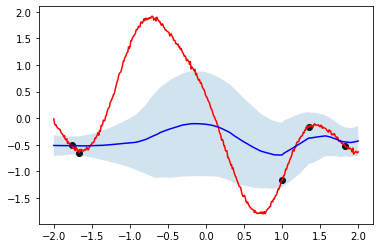

 65%|██████▌   | 130004/200000 [50:47<54:37, 21.36it/s]

Validation loss for the function plotted:                                     1.253


 65%|██████▌   | 130998/200000 [51:13<23:55, 48.07it/s]  

Mean training loss at epoch 131000 :                         0.428
Mean Validation loss after 131000 equals                     0.631



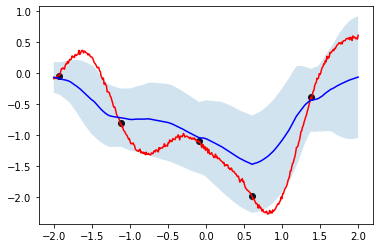

 66%|██████▌   | 131008/200000 [51:14<34:52, 32.97it/s]

Validation loss for the function plotted:                                     0.631


 66%|██████▌   | 131994/200000 [51:37<26:23, 42.94it/s]  

Mean training loss at epoch 132000 :                         0.281
Mean Validation loss after 132000 equals                     0.995



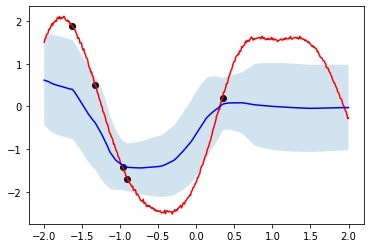

 66%|██████▌   | 132001/200000 [51:37<32:08, 35.26it/s]

Validation loss for the function plotted:                                     0.995


 66%|██████▋   | 132997/200000 [52:17<1:08:07, 16.39it/s]

Mean training loss at epoch 133000 :                         0.736
Mean Validation loss after 133000 equals                     1.421



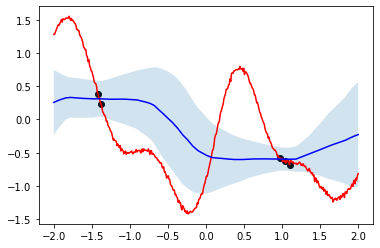

 67%|██████▋   | 133006/200000 [52:18<1:19:17, 14.08it/s]

Validation loss for the function plotted:                                     1.421


 67%|██████▋   | 133999/200000 [52:57<1:00:02, 18.32it/s]

Mean training loss at epoch 134000 :                         0.721
Mean Validation loss after 134000 equals                     0.912



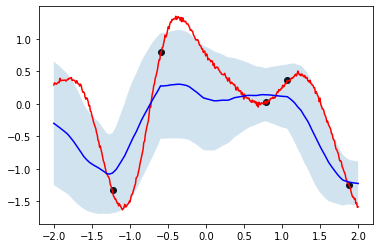

 67%|██████▋   | 134007/200000 [52:58<58:09, 18.91it/s]  

Validation loss for the function plotted:                                     0.912


 67%|██████▋   | 134998/200000 [53:34<20:17, 53.38it/s]  

Mean training loss at epoch 135000 :                         0.398
Mean Validation loss after 135000 equals                     0.941



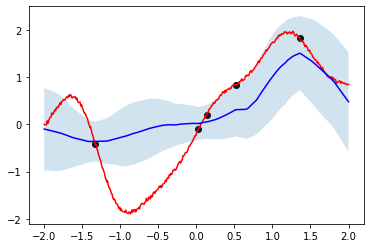

Validation loss for the function plotted:                                     0.941


 68%|██████▊   | 135999/200000 [53:58<34:04, 31.30it/s]

Mean training loss at epoch 136000 :                         0.529
Mean Validation loss after 136000 equals                     1.198



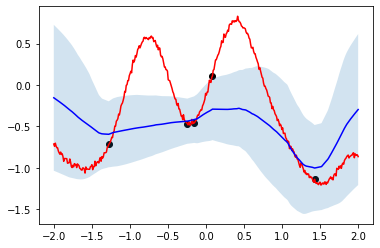

 68%|██████▊   | 136003/200000 [54:00<2:31:22,  7.05it/s]

Validation loss for the function plotted:                                     1.198


 68%|██████▊   | 137000/200000 [54:28<21:52, 48.00it/s]  

Mean training loss at epoch 137000 :                         0.621
Mean Validation loss after 137000 equals                     1.801



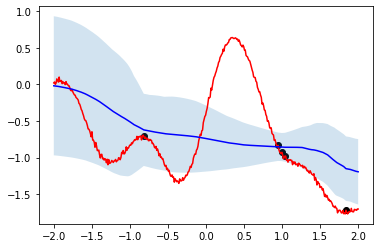

 69%|██████▊   | 137005/200000 [54:28<52:09, 20.13it/s]

Validation loss for the function plotted:                                     1.801


 69%|██████▉   | 137996/200000 [55:03<33:28, 30.87it/s]  

Mean training loss at epoch 138000 :                         0.797
Mean Validation loss after 138000 equals                     1.086



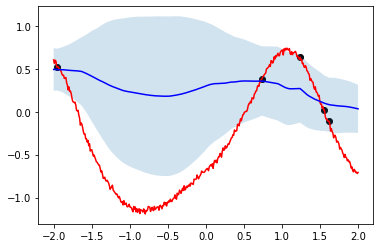

 69%|██████▉   | 138001/200000 [55:03<42:00, 24.59it/s]

Validation loss for the function plotted:                                     1.086


 69%|██████▉   | 138996/200000 [55:45<30:52, 32.94it/s]  

Mean training loss at epoch 139000 :                         1.031
Mean Validation loss after 139000 equals                     0.995



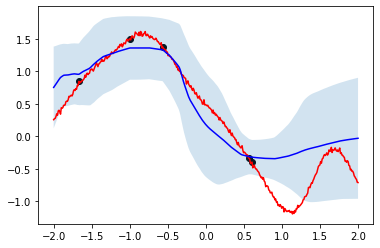

 70%|██████▉   | 139006/200000 [55:46<36:39, 27.73it/s]

Validation loss for the function plotted:                                     0.995


 70%|██████▉   | 139998/200000 [56:10<19:48, 50.51it/s]  

Mean training loss at epoch 140000 :                         0.737
Mean Validation loss after 140000 equals                     0.82



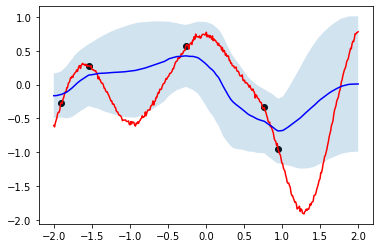

 70%|███████   | 140004/200000 [56:10<50:53, 19.65it/s]

Validation loss for the function plotted:                                     0.82


 70%|███████   | 140999/200000 [56:34<16:58, 57.91it/s]  

Mean training loss at epoch 141000 :                         0.745
Mean Validation loss after 141000 equals                     0.766



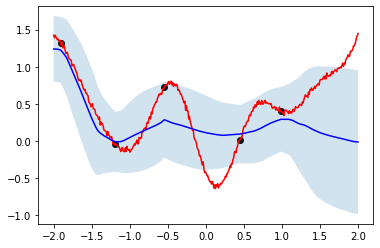

Validation loss for the function plotted:                                     0.766


 71%|███████   | 141998/200000 [56:57<24:21, 39.68it/s]  

Mean training loss at epoch 142000 :                         0.418
Mean Validation loss after 142000 equals                     0.709



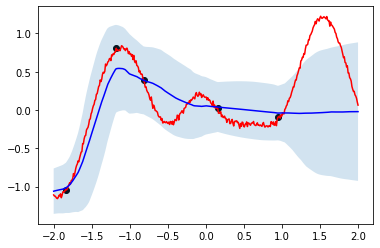

 71%|███████   | 142008/200000 [56:58<32:59, 29.30it/s]

Validation loss for the function plotted:                                     0.709


 72%|███████▏  | 143000/200000 [57:18<18:41, 50.81it/s]

Mean training loss at epoch 143000 :                         0.744
Mean Validation loss after 143000 equals                     1.571



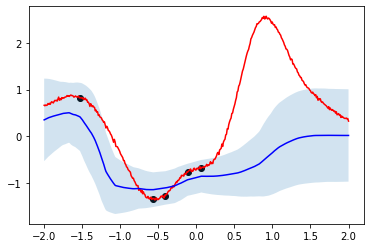

Validation loss for the function plotted:                                     1.571


 72%|███████▏  | 143999/200000 [57:39<20:50, 44.80it/s]

Mean training loss at epoch 144000 :                         0.48
Mean Validation loss after 144000 equals                     0.956



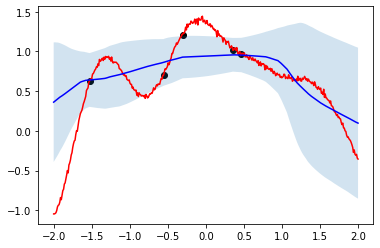

 72%|███████▏  | 144010/200000 [57:40<27:48, 33.55it/s]

Validation loss for the function plotted:                                     0.956


 72%|███████▏  | 144996/200000 [58:04<19:10, 47.82it/s]

Mean training loss at epoch 145000 :                         0.253
Mean Validation loss after 145000 equals                     1.076



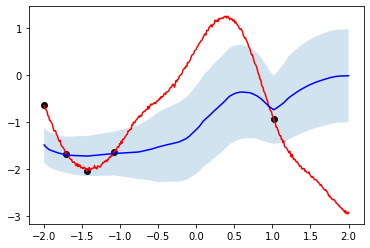

Validation loss for the function plotted:                                     1.076


 73%|███████▎  | 145998/200000 [58:29<20:23, 44.14it/s]  

Mean training loss at epoch 146000 :                         0.578
Mean Validation loss after 146000 equals                     0.762



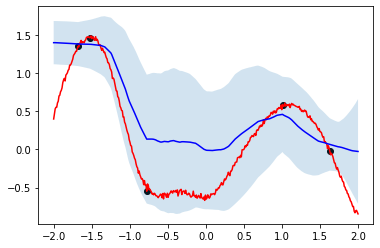

 73%|███████▎  | 146008/200000 [58:30<27:44, 32.43it/s]

Validation loss for the function plotted:                                     0.762


 73%|███████▎  | 146998/200000 [58:55<20:07, 43.88it/s]  

Mean training loss at epoch 147000 :                         0.881
Mean Validation loss after 147000 equals                     1.131



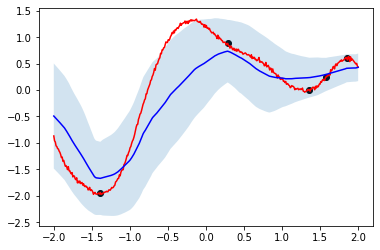

 74%|███████▎  | 147008/200000 [58:56<28:38, 30.83it/s]

Validation loss for the function plotted:                                     1.131


 74%|███████▍  | 147996/200000 [59:21<16:00, 54.14it/s]  

Mean training loss at epoch 148000 :                         0.661
Mean Validation loss after 148000 equals                     0.851



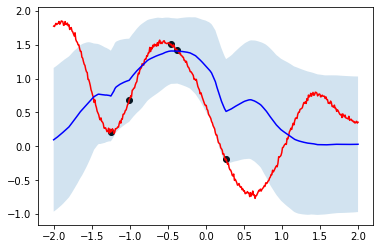

 74%|███████▍  | 148007/200000 [59:21<25:07, 34.48it/s]

Validation loss for the function plotted:                                     0.851


 74%|███████▍  | 148997/200000 [59:47<19:14, 44.18it/s]  

Mean training loss at epoch 149000 :                         0.897
Mean Validation loss after 149000 equals                     1.413



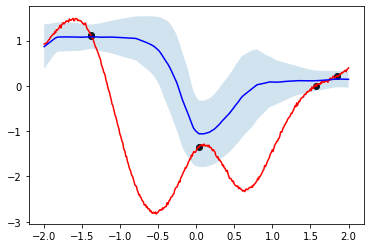

Validation loss for the function plotted:                                     1.413


 75%|███████▌  | 150000/200000 [1:00:13<19:42, 42.30it/s]

Mean training loss at epoch 150000 :                         0.966
Mean Validation loss after 150000 equals                     0.738



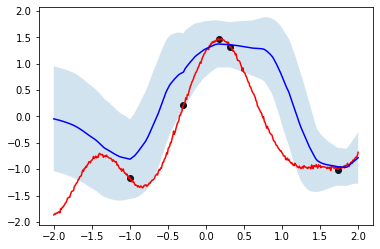

 75%|███████▌  | 150005/200000 [1:00:13<45:32, 18.30it/s]

Validation loss for the function plotted:                                     0.738


 76%|███████▌  | 151000/200000 [1:00:42<24:58, 32.69it/s]  

Mean training loss at epoch 151000 :                         0.918
Mean Validation loss after 151000 equals                     0.984



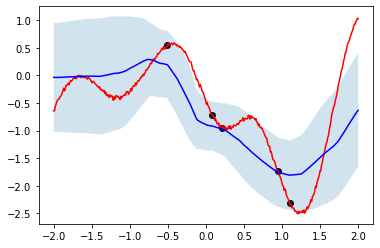

 76%|███████▌  | 151004/200000 [1:00:43<41:07, 19.86it/s]

Validation loss for the function plotted:                                     0.984


 76%|███████▌  | 151997/200000 [1:01:03<14:46, 54.13it/s]

Mean training loss at epoch 152000 :                         0.535
Mean Validation loss after 152000 equals                     1.403



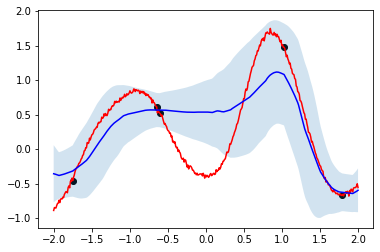

Validation loss for the function plotted:                                     1.403


 76%|███████▋  | 152996/200000 [1:01:25<14:43, 53.21it/s]

Mean training loss at epoch 153000 :                         0.593
Mean Validation loss after 153000 equals                     1.346



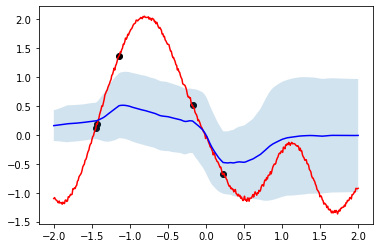

 77%|███████▋  | 153007/200000 [1:01:25<22:07, 35.39it/s]

Validation loss for the function plotted:                                     1.346


 77%|███████▋  | 153996/200000 [1:01:49<16:53, 45.37it/s]  

Mean training loss at epoch 154000 :                         0.536
Mean Validation loss after 154000 equals                     0.859



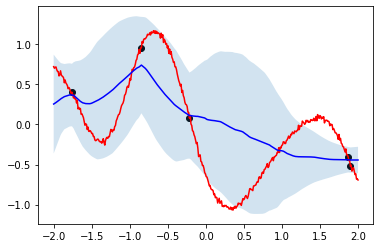

 77%|███████▋  | 154006/200000 [1:01:49<24:01, 31.90it/s]

Validation loss for the function plotted:                                     0.859


 77%|███████▋  | 154998/200000 [1:02:11<16:00, 46.85it/s]

Mean training loss at epoch 155000 :                         0.463
Mean Validation loss after 155000 equals                     0.667



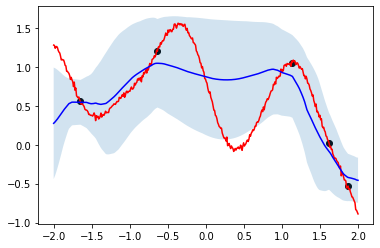

 78%|███████▊  | 155008/200000 [1:02:11<23:11, 32.32it/s]

Validation loss for the function plotted:                                     0.667


 78%|███████▊  | 156000/200000 [1:02:38<15:10, 48.33it/s]

Mean training loss at epoch 156000 :                         -0.063
Mean Validation loss after 156000 equals                     1.536



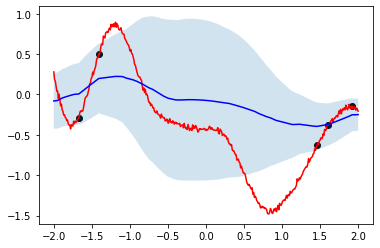

 78%|███████▊  | 156005/200000 [1:02:39<24:19, 30.14it/s]

Validation loss for the function plotted:                                     1.536


 78%|███████▊  | 157000/200000 [1:03:00<14:17, 50.16it/s]

Mean training loss at epoch 157000 :                         0.365
Mean Validation loss after 157000 equals                     1.163



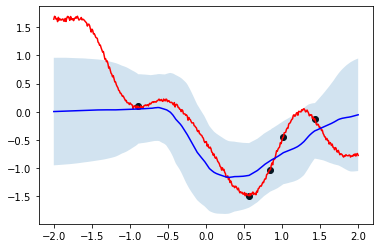

Validation loss for the function plotted:                                     1.163


 79%|███████▉  | 158000/200000 [1:03:21<11:49, 59.19it/s]

Mean training loss at epoch 158000 :                         0.559
Mean Validation loss after 158000 equals                     0.945



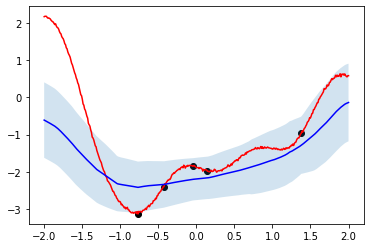

Validation loss for the function plotted:                                     0.945


 79%|███████▉  | 158996/200000 [1:03:41<13:52, 49.22it/s]

Mean training loss at epoch 159000 :                         0.718
Mean Validation loss after 159000 equals                     0.981



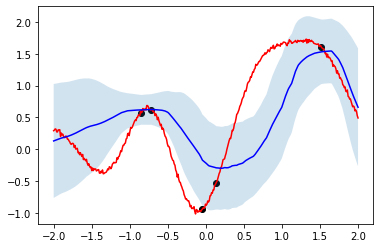

Validation loss for the function plotted:                                     0.981


 80%|████████  | 160000/200000 [1:04:01<14:35, 45.69it/s]

Mean training loss at epoch 160000 :                         0.845
Mean Validation loss after 160000 equals                     0.749



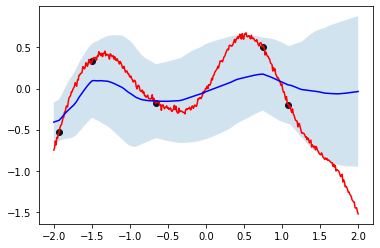

 80%|████████  | 160005/200000 [1:04:01<23:54, 27.88it/s]

Validation loss for the function plotted:                                     0.749


 80%|████████  | 160998/200000 [1:04:22<11:41, 55.62it/s]

Mean training loss at epoch 161000 :                         0.384
Mean Validation loss after 161000 equals                     0.825



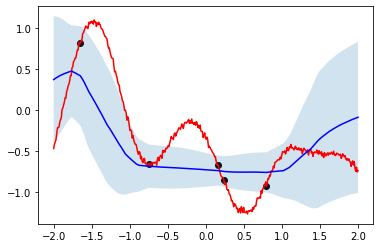

Validation loss for the function plotted:                                     0.825


 81%|████████  | 162000/200000 [1:04:43<12:34, 50.39it/s]

Mean training loss at epoch 162000 :                         1.572
Mean Validation loss after 162000 equals                     0.85



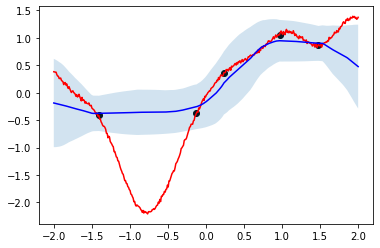

 81%|████████  | 162006/200000 [1:04:43<19:40, 32.18it/s]

Validation loss for the function plotted:                                     0.85


 82%|████████▏ | 163000/200000 [1:05:03<12:02, 51.25it/s]

Mean training loss at epoch 163000 :                         0.704
Mean Validation loss after 163000 equals                     0.934



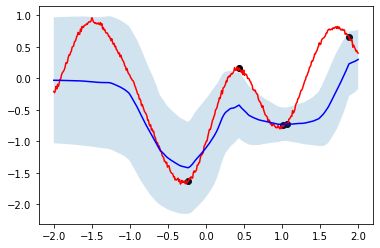

 82%|████████▏ | 163011/200000 [1:05:03<18:33, 33.23it/s]

Validation loss for the function plotted:                                     0.934


 82%|████████▏ | 163999/200000 [1:05:24<15:25, 38.90it/s]

Mean training loss at epoch 164000 :                         0.314
Mean Validation loss after 164000 equals                     1.101



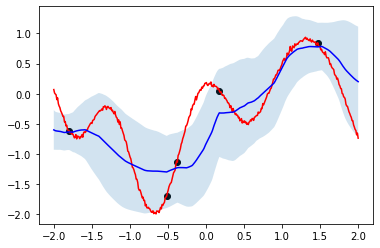

 82%|████████▏ | 164009/200000 [1:05:24<21:45, 27.58it/s]

Validation loss for the function plotted:                                     1.101


 82%|████████▎ | 165000/200000 [1:05:45<11:38, 50.14it/s]

Mean training loss at epoch 165000 :                         0.91
Mean Validation loss after 165000 equals                     1.161



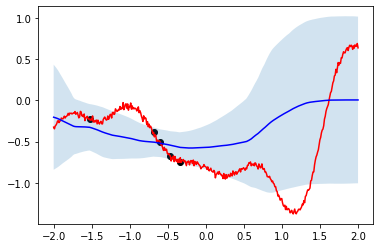

 83%|████████▎ | 165006/200000 [1:05:46<19:11, 30.39it/s]

Validation loss for the function plotted:                                     1.161


 83%|████████▎ | 165998/200000 [1:06:07<11:55, 47.55it/s]

Mean training loss at epoch 166000 :                         0.391
Mean Validation loss after 166000 equals                     0.769



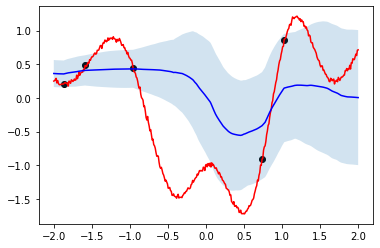

 83%|████████▎ | 166008/200000 [1:06:07<18:30, 30.62it/s]

Validation loss for the function plotted:                                     0.769


 83%|████████▎ | 166999/200000 [1:06:36<16:20, 33.67it/s]

Mean training loss at epoch 167000 :                         0.333
Mean Validation loss after 167000 equals                     0.807



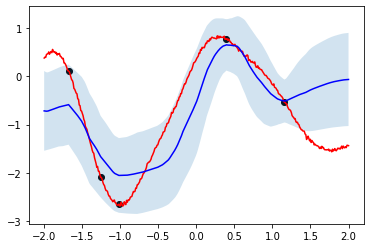

 84%|████████▎ | 167008/200000 [1:06:36<21:19, 25.78it/s]

Validation loss for the function plotted:                                     0.807


 84%|████████▍ | 167998/200000 [1:07:10<15:34, 34.26it/s]  

Mean training loss at epoch 168000 :                         0.544
Mean Validation loss after 168000 equals                     0.821



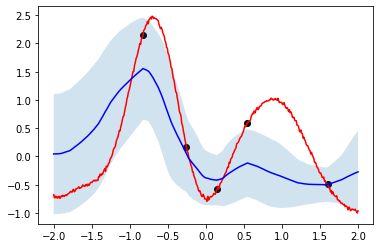

 84%|████████▍ | 168006/200000 [1:07:11<23:11, 22.99it/s]

Validation loss for the function plotted:                                     0.821


 84%|████████▍ | 168996/200000 [1:07:34<10:21, 49.86it/s]

Mean training loss at epoch 169000 :                         0.883
Mean Validation loss after 169000 equals                     0.919



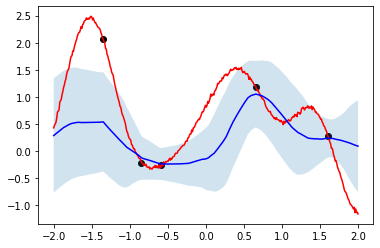

 85%|████████▍ | 169008/200000 [1:07:35<14:12, 36.35it/s]

Validation loss for the function plotted:                                     0.919


 85%|████████▍ | 169999/200000 [1:07:58<10:49, 46.20it/s]

Mean training loss at epoch 170000 :                         0.466
Mean Validation loss after 170000 equals                     1.343



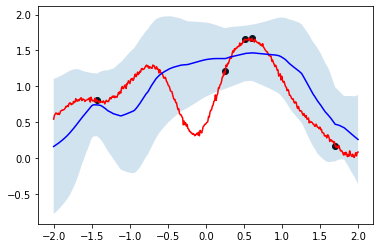

 85%|████████▌ | 170009/200000 [1:07:59<15:22, 32.50it/s]

Validation loss for the function plotted:                                     1.343


 85%|████████▌ | 170998/200000 [1:08:42<08:53, 54.33it/s]  

Mean training loss at epoch 171000 :                         0.501
Mean Validation loss after 171000 equals                     0.834



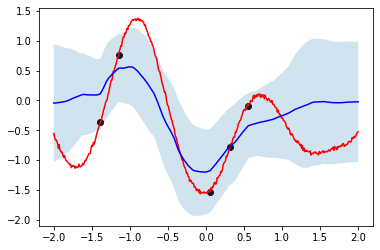

Validation loss for the function plotted:                                     0.834


 86%|████████▌ | 171999/200000 [1:09:11<08:30, 54.86it/s]

Mean training loss at epoch 172000 :                         0.43
Mean Validation loss after 172000 equals                     1.314



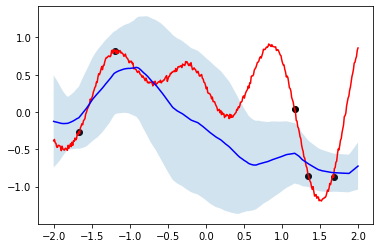

 86%|████████▌ | 172012/200000 [1:09:11<11:29, 40.58it/s]

Validation loss for the function plotted:                                     1.314


 86%|████████▋ | 173000/200000 [1:09:31<08:44, 51.51it/s]

Mean training loss at epoch 173000 :                         0.894
Mean Validation loss after 173000 equals                     0.811



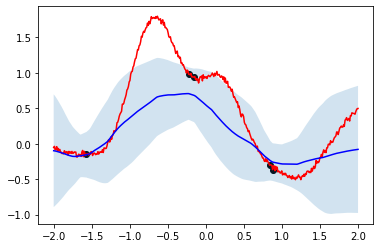

 87%|████████▋ | 173006/200000 [1:09:32<13:36, 33.06it/s]

Validation loss for the function plotted:                                     0.811


 87%|████████▋ | 173997/200000 [1:09:57<09:06, 47.58it/s]

Mean training loss at epoch 174000 :                         0.406
Mean Validation loss after 174000 equals                     0.912



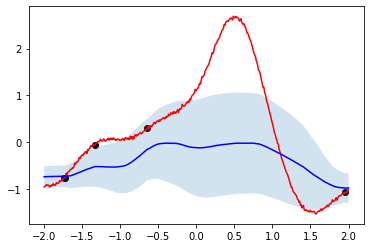

 87%|████████▋ | 174008/200000 [1:09:58<12:35, 34.43it/s]

Validation loss for the function plotted:                                     0.912


 87%|████████▋ | 174999/200000 [1:10:28<08:38, 48.26it/s]  

Mean training loss at epoch 175000 :                         0.601
Mean Validation loss after 175000 equals                     1.37



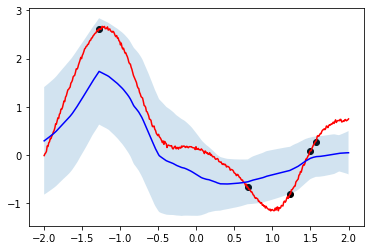

 88%|████████▊ | 175010/200000 [1:10:29<12:36, 33.05it/s]

Validation loss for the function plotted:                                     1.37


 88%|████████▊ | 175999/200000 [1:10:51<07:22, 54.25it/s]

Mean training loss at epoch 176000 :                         0.595
Mean Validation loss after 176000 equals                     1.367



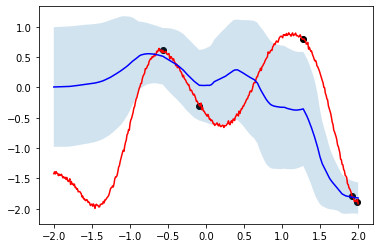

 88%|████████▊ | 176005/200000 [1:10:52<16:21, 24.44it/s]

Validation loss for the function plotted:                                     1.367


 88%|████████▊ | 176997/200000 [1:11:19<08:55, 42.98it/s]  

Mean training loss at epoch 177000 :                         0.719
Mean Validation loss after 177000 equals                     0.942



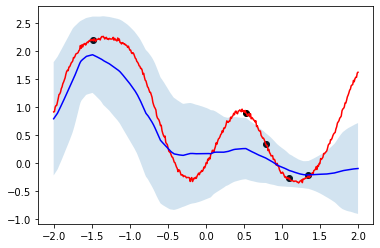

 89%|████████▊ | 177007/200000 [1:11:20<12:57, 29.57it/s]

Validation loss for the function plotted:                                     0.942


 89%|████████▉ | 177995/200000 [1:11:44<07:22, 49.69it/s]  

Mean training loss at epoch 178000 :                         0.802
Mean Validation loss after 178000 equals                     1.018



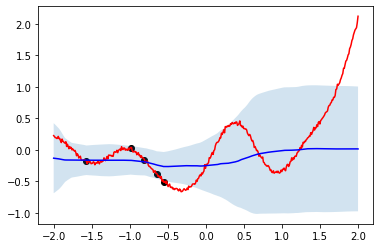

 89%|████████▉ | 178006/200000 [1:11:45<11:27, 32.00it/s]

Validation loss for the function plotted:                                     1.018


 90%|████████▉ | 179000/200000 [1:12:39<07:43, 45.33it/s]  

Mean training loss at epoch 179000 :                         0.836
Mean Validation loss after 179000 equals                     0.717



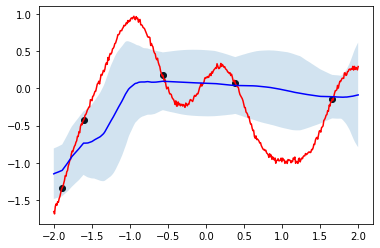

 90%|████████▉ | 179005/200000 [1:12:39<13:30, 25.89it/s]

Validation loss for the function plotted:                                     0.717


 90%|████████▉ | 179999/200000 [1:13:07<07:30, 44.42it/s]

Mean training loss at epoch 180000 :                         0.482
Mean Validation loss after 180000 equals                     0.917



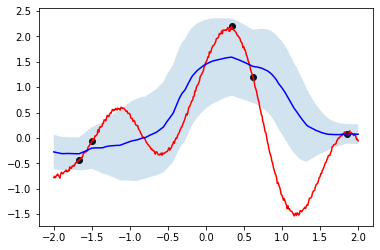

 90%|█████████ | 180010/200000 [1:13:08<10:33, 31.58it/s]

Validation loss for the function plotted:                                     0.917


 90%|█████████ | 180996/200000 [1:13:29<06:56, 45.60it/s]

Mean training loss at epoch 181000 :                         0.623
Mean Validation loss after 181000 equals                     0.611



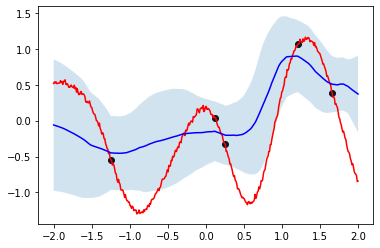

 91%|█████████ | 181005/200000 [1:13:30<10:26, 30.30it/s]

Validation loss for the function plotted:                                     0.611


 91%|█████████ | 182000/200000 [1:13:53<05:24, 55.47it/s]

Mean training loss at epoch 182000 :                         0.912
Mean Validation loss after 182000 equals                     1.051



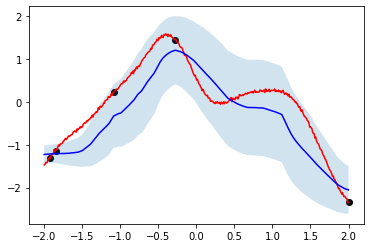

 91%|█████████ | 182006/200000 [1:13:53<09:12, 32.59it/s]

Validation loss for the function plotted:                                     1.051


 91%|█████████▏| 182998/200000 [1:14:22<11:11, 25.31it/s]

Mean training loss at epoch 183000 :                         0.662
Mean Validation loss after 183000 equals                     0.66



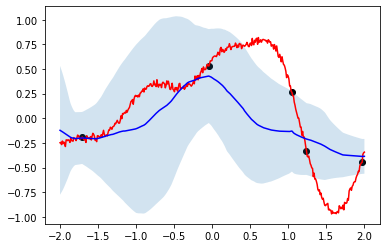

 92%|█████████▏| 183006/200000 [1:14:22<13:35, 20.84it/s]

Validation loss for the function plotted:                                     0.66


 92%|█████████▏| 183996/200000 [1:14:46<06:47, 39.29it/s]

Mean training loss at epoch 184000 :                         0.738
Mean Validation loss after 184000 equals                     0.982



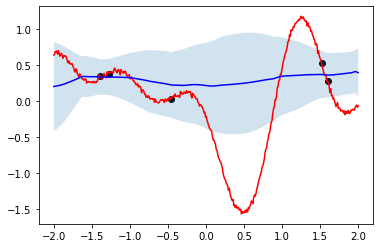

 92%|█████████▏| 184005/200000 [1:14:46<09:03, 29.44it/s]

Validation loss for the function plotted:                                     0.982


 92%|█████████▏| 184995/200000 [1:15:12<04:49, 51.77it/s]

Mean training loss at epoch 185000 :                         0.693
Mean Validation loss after 185000 equals                     1.086



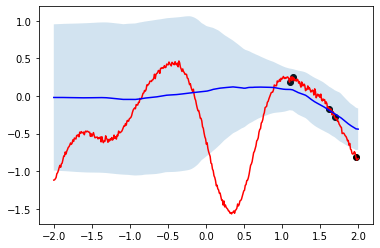

 93%|█████████▎| 185006/200000 [1:15:12<07:43, 32.38it/s]

Validation loss for the function plotted:                                     1.086


 93%|█████████▎| 185999/200000 [1:15:36<04:33, 51.25it/s]

Mean training loss at epoch 186000 :                         0.745
Mean Validation loss after 186000 equals                     0.681



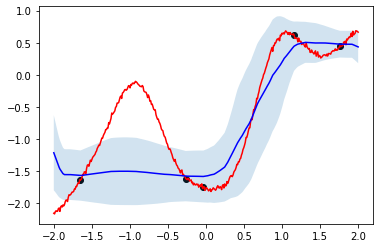

Validation loss for the function plotted:                                     0.681


 94%|█████████▎| 187000/200000 [1:16:21<04:26, 48.79it/s]  

Mean training loss at epoch 187000 :                         0.601
Mean Validation loss after 187000 equals                     1.056



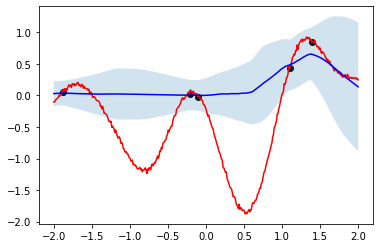

Validation loss for the function plotted:                                     1.056


 94%|█████████▍| 188000/200000 [1:16:48<07:45, 25.78it/s]

Mean training loss at epoch 188000 :                         0.826
Mean Validation loss after 188000 equals                     0.85



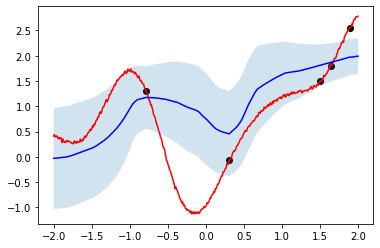

 94%|█████████▍| 188010/200000 [1:16:48<08:27, 23.62it/s]

Validation loss for the function plotted:                                     0.85


 94%|█████████▍| 188998/200000 [1:17:28<10:25, 17.60it/s]  

Mean training loss at epoch 189000 :                         0.256
Mean Validation loss after 189000 equals                     0.908



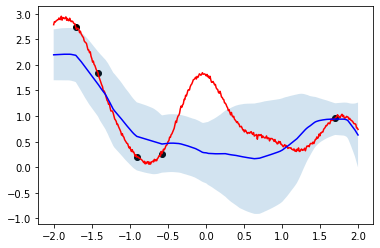

 95%|█████████▍| 189003/200000 [1:17:29<25:47,  7.11it/s]

Validation loss for the function plotted:                                     0.908


 95%|█████████▍| 189998/200000 [1:17:56<05:08, 32.45it/s]

Mean training loss at epoch 190000 :                         0.753
Mean Validation loss after 190000 equals                     0.593



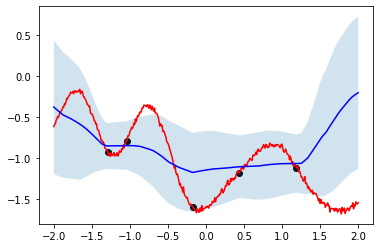

 95%|█████████▌| 190007/200000 [1:17:56<06:21, 26.21it/s]

Validation loss for the function plotted:                                     0.593


 95%|█████████▌| 190997/200000 [1:18:19<03:25, 43.88it/s]

Mean training loss at epoch 191000 :                         0.629
Mean Validation loss after 191000 equals                     1.113



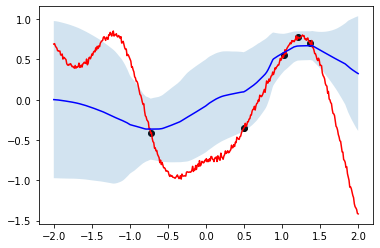

 96%|█████████▌| 191007/200000 [1:18:20<04:34, 32.73it/s]

Validation loss for the function plotted:                                     1.113


 96%|█████████▌| 191996/200000 [1:18:45<06:48, 19.61it/s]

Mean training loss at epoch 192000 :                         1.028
Mean Validation loss after 192000 equals                     1.337



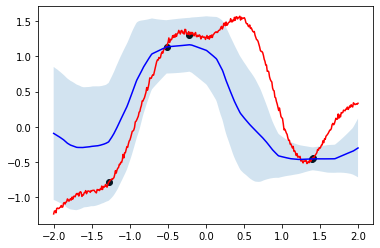

 96%|█████████▌| 192004/200000 [1:18:46<07:04, 18.82it/s]

Validation loss for the function plotted:                                     1.337


 96%|█████████▋| 192999/200000 [1:19:14<02:58, 39.32it/s]

Mean training loss at epoch 193000 :                         0.536
Mean Validation loss after 193000 equals                     1.009



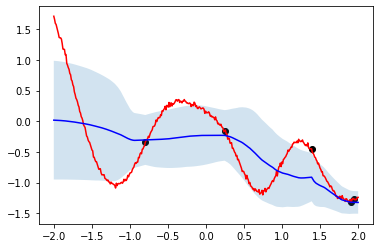

 97%|█████████▋| 193007/200000 [1:19:14<04:33, 25.58it/s]

Validation loss for the function plotted:                                     1.009


 97%|█████████▋| 193999/200000 [1:19:37<02:08, 46.67it/s]

Mean training loss at epoch 194000 :                         0.599
Mean Validation loss after 194000 equals                     1.194



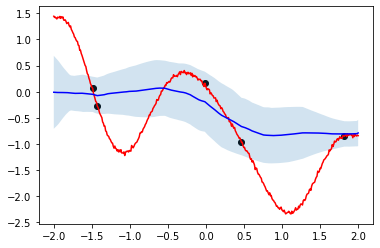

 97%|█████████▋| 194009/200000 [1:19:37<02:59, 33.41it/s]

Validation loss for the function plotted:                                     1.194


 97%|█████████▋| 194997/200000 [1:20:02<02:32, 32.91it/s]

Mean training loss at epoch 195000 :                         0.837
Mean Validation loss after 195000 equals                     0.755



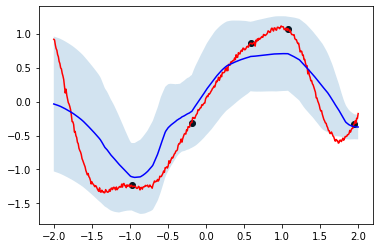

Validation loss for the function plotted:                                     0.755


 98%|█████████▊| 195998/200000 [1:20:31<01:58, 33.70it/s]

Mean training loss at epoch 196000 :                         0.564
Mean Validation loss after 196000 equals                     0.819



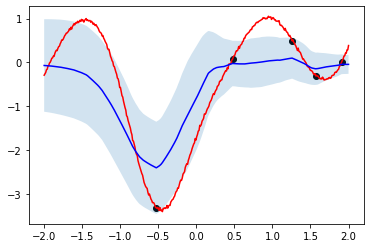

 98%|█████████▊| 196006/200000 [1:20:31<02:43, 24.41it/s]

Validation loss for the function plotted:                                     0.819


 98%|█████████▊| 196998/200000 [1:20:52<01:02, 48.39it/s]

Mean training loss at epoch 197000 :                         0.317
Mean Validation loss after 197000 equals                     1.045



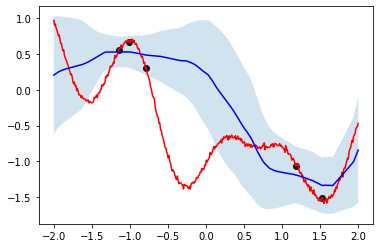

 99%|█████████▊| 197009/200000 [1:20:53<01:28, 33.92it/s]

Validation loss for the function plotted:                                     1.045


 99%|█████████▉| 197998/200000 [1:21:14<00:41, 48.19it/s]

Mean training loss at epoch 198000 :                         0.65
Mean Validation loss after 198000 equals                     1.038



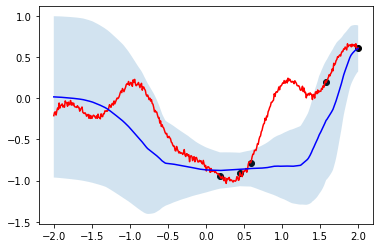

 99%|█████████▉| 198009/200000 [1:21:15<00:58, 34.27it/s]

Validation loss for the function plotted:                                     1.038


 99%|█████████▉| 198996/200000 [1:21:37<00:17, 56.42it/s]

Mean training loss at epoch 199000 :                         0.7
Mean Validation loss after 199000 equals                     0.963



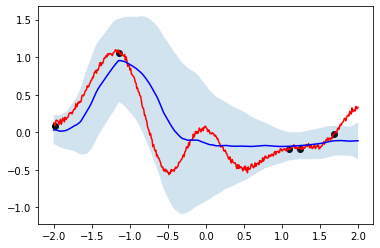

Validation loss for the function plotted:                                     0.963


100%|██████████| 200000/200000 [1:21:58<00:00, 40.66it/s]


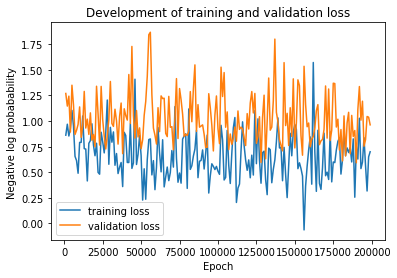

AttributeError: 'TargetBasedAggregation' object has no attribute 'state_dict'

In [43]:
run_experiment(config_file=mean_exp_config,
               experiment_name='1d_gp_mean_5ctxt',
              google_colab=google_colab)

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation
seed is set


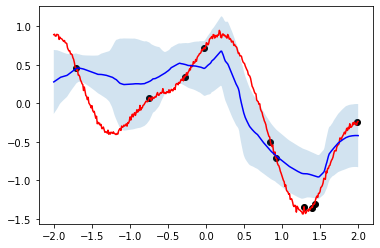

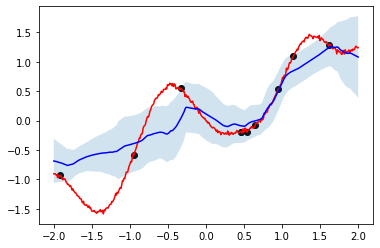

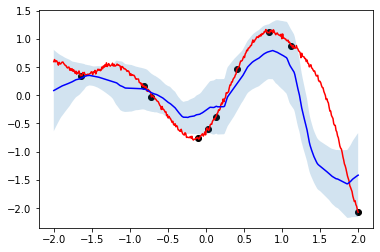

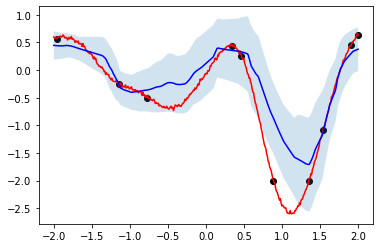

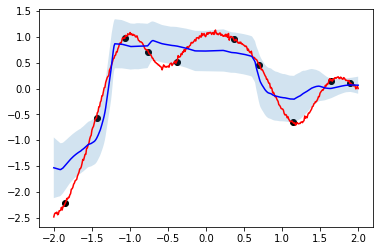

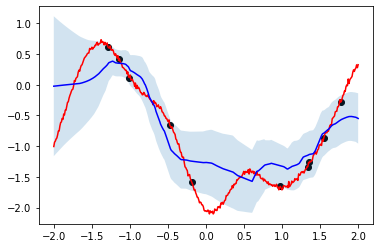

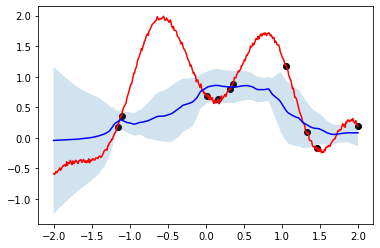

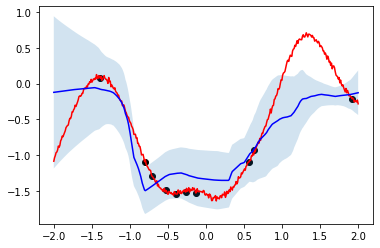

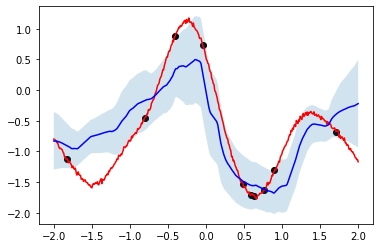

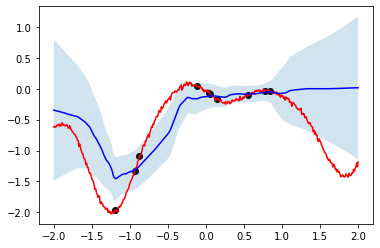

In [30]:
## Predicting with twice the number of context points
experiment_name = '1d_gp_mean_5ctxt_2020_06_30_12_14'
result_path = 'experiments/results'
with open(os.path.join(result_path, experiment_name,'config_file.json')) as file:
    experiment_config = json.load(file)

experiment_config['cnp_params']['max_contx']=20
CondNeuralProcess = RegressionCNP(**experiment_config['cnp_params'])

trainer = RegressionTrainer(
    data_kwargs=experiment_config['data_kwargs'],
    cnp=CondNeuralProcess,
     **experiment_config['experiment_params'])

if train_on_gpu:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'))
else:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'),map_location=torch.device('cpu'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'),map_location=torch.device('cpu'))

total_mse, task_mses = trainer.run_test(
    encoder_state_dict,
    decoder_state_dict,
    aggregator_state_dict=None,
    batch_size_test=experiment_config['train_kwargs']['batch_size_test'],
    plot_mode=experiment_config['train_kwargs']['plot_mode'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation
seed is set


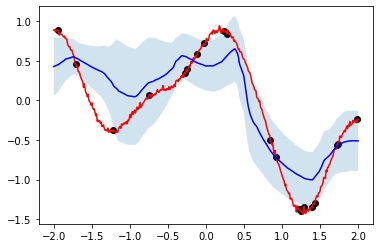

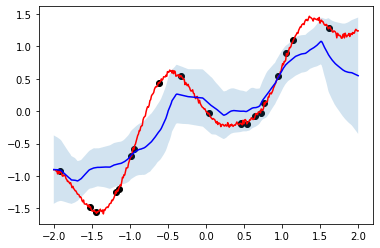

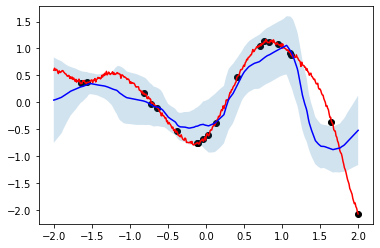

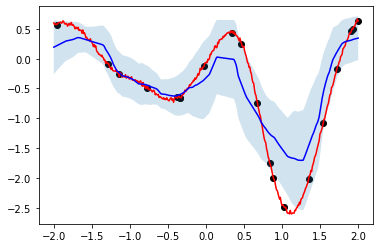

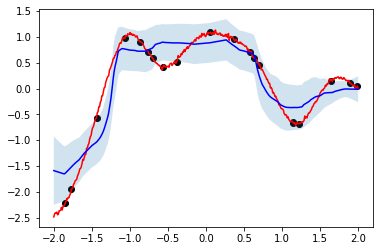

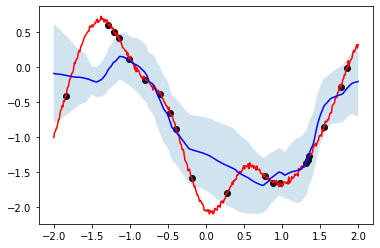

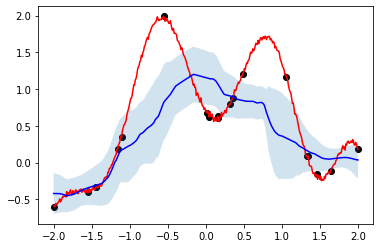

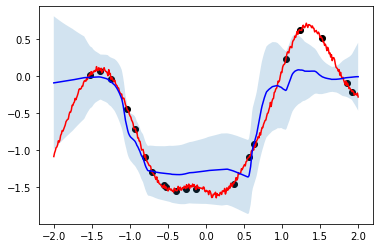

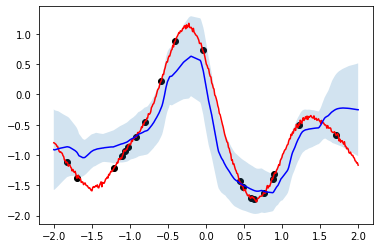

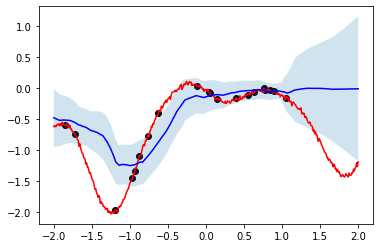

In [31]:
## Predicting with twice the number of context points
experiment_name = '1d_gp_mean_5ctxt_2020_06_30_12_14'
result_path = 'experiments/results'
with open(os.path.join(result_path, experiment_name,'config_file.json')) as file:
    experiment_config = json.load(file)

experiment_config['cnp_params']['max_contx']=40
CondNeuralProcess = RegressionCNP(**experiment_config['cnp_params'])

trainer = RegressionTrainer(
    data_kwargs=experiment_config['data_kwargs'],
    cnp=CondNeuralProcess,
     **experiment_config['experiment_params'])

if train_on_gpu:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'))
else:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'),map_location=torch.device('cpu'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'),map_location=torch.device('cpu'))

total_mse, task_mses = trainer.run_test(
    encoder_state_dict,
    decoder_state_dict,
    aggregator_state_dict=None,
    batch_size_test=experiment_config['train_kwargs']['batch_size_test'],
    plot_mode=experiment_config['train_kwargs']['plot_mode'])

## Max Experiment 

In [ ]:
max_exp_config = copy(base_config)

In [ ]:
max_exp_config['cnp_params']['aggregation_kwargs']['simple_aggregator_type']='max'


 10%|█         | 1/10 [00:00<00:01,  6.44it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=138, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using max operation
Mean training loss at epoch 0 :                         1.455
Mean Validation loss after 0 equals                     1.535



100%|██████████| 10/10 [00:01<00:00,  6.98it/s]


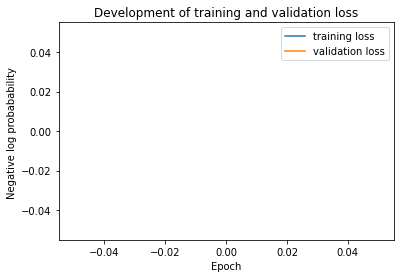

The mean squared error for this experiment is 1.0110417211055756
Creating new directory at experiments/results/10d_gp_max_2020_06_29_15_56
Saving encoder
Saving decoder
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config
Saving snapshot of the sytems


In [ ]:
run_experiment(config_file=max_exp_config,
               experiment_name='1d_gp_max',
              google_colab=google_colab)

##  Sum Experiment 

In [ ]:
sum_exp_config = copy(base_config)

In [ ]:
sum_exp_config['cnp_params']['aggregation_kwargs']['simple_aggregator_type']='sum'

 10%|█         | 1/10 [00:00<00:01,  7.08it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=138, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using sum operation
Mean training loss at epoch 0 :                         1.624
Mean Validation loss after 0 equals                     1.574



100%|██████████| 10/10 [00:01<00:00,  7.05it/s]


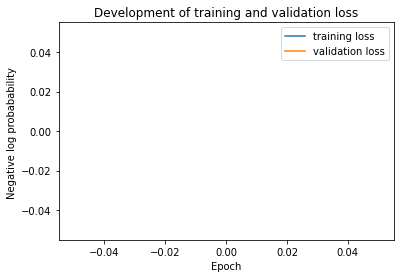

The mean squared error for this experiment is 1.0159607970714568
Creating new directory at experiments/results/10d_gp_sum_2020_06_29_15_56
Saving encoder
Saving decoder
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config
Saving snapshot of the sytems


In [ ]:
run_experiment(config_file=sum_exp_config,
               experiment_name='1d_gp_sum',
              google_colab=google_colab)

##  Attention Model Experiment 

In [ ]:
aggregation_kwargs ={
      "aggregator": "BasicMLPAggregator",
      "insize": 128,
      "num_layers": 2,
      "num_neurons": 64,
      "dimout": 1
    }

In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs

  0%|          | 0/10 [00:00<?, ?it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=138, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
BasicMLPAggregator(
  (_process_input): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
  (softmax): Softmax(dim=1)
)


 10%|█         | 1/10 [00:00<00:01,  6.81it/s]

Mean training loss at epoch 0 :                         1.445
Mean Validation loss after 0 equals                     1.511



100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


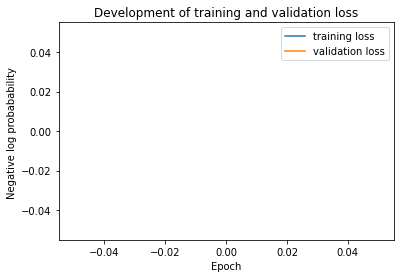

The mean squared error for this experiment is 1.0015557771921157
Creating new directory at experiments/results/10d_gp_attention_2020_06_29_15_56
Saving encoder
Saving decoder
Saving aggregator
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config
Saving snapshot of the sytems


In [ ]:
run_experiment(config_file=attention_exp_config,
               experiment_name='1d_gp_attention',
              google_colab=google_colab)

##  Gated attention Model Experiment 

In [32]:
Helper.scale_shift_uniform(-2,2,*(400,5)).shape

torch.Size([400, 5])

In [28]:
torch.rand?

In [40]:
torch.norm?

In [45]:
torch.normal(0,1,(1,2)).double()

tensor([[-0.3963,  1.7399]], dtype=torch.float64)

In [9]:
import math

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [26]:
x  = np.linspace(-1,1, 100)

In [27]:
y = [0.1+0.9*(math.log(1+math.exp(val))) for val in x]

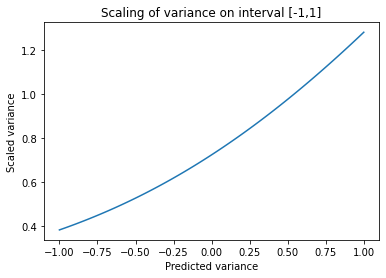

In [30]:
plt.plot(x,y)
plt.title('Scaling of variance on interval [-1,1]')
plt.xlabel('Predicted variance')
plt.ylabel('Scaled variance')

plt.show()
plt.close()

In [3]:
import math
math.log

<function math.log>

In [4]:
math.log(1)

0.0